# New York Drinking Water; Turbidity Anomalies Detection

## Load library

In [2]:
# load library
library(forecast)
library(repr)
library(tidyverse)
library(urca)
library(gridExtra)
library(seastests)
library(naniar)
library(imputeTS)
library(tsbox)  # maybe needed
library(corrplot)
library(tseries)
library(anomalize)
library(knitr)
library(tibbletime)
library(scales)
library(tsoutliers)
library(TSA)

## Load data

In [4]:
load("outlier.RData")

In [191]:
drink <- read.csv("drinking-water-quality-distribution-monitoring-data.csv")

# Data Preprocessing

## Explore data

In [192]:
str(drink)  # even the date time is as character
# only the residual free chlorine is in num

'data.frame':	72709 obs. of  11 variables:
 $ Sample.Number                      : int  32355 32320 32357 32353 32371 32368 32363 32364 32373 32375 ...
 $ Sample.Date                        : chr  "2019-10-31T00:00:00.000" "2019-10-31T00:00:00.000" "2019-10-31T00:00:00.000" "2019-10-31T00:00:00.000" ...
 $ Sample.Time                        : chr  "8:23" "11:14" "11:33" "7:47" ...
 $ Sample.Site                        : chr  "24950" "13550" "50200" "24650" ...
 $ Sample.class                       : chr  "Compliance" "Compliance" "Operational" "Compliance" ...
 $ Location                           : chr  "SS - IFO 1169 N/S East New York Ave, 2nd SS W/O Ralph Ave, 12 \"" "SS - IFO 2015 W/S University Ave, 1st SS S/O W 180th St, 12 \"" "SS - IFO 93 N/S Austin Place, BTW Victory Blvd & Ward Ave, 84 \"" "SS - N/S Linden Blvd, 1st SS E/O Bristol St, 12 \"" ...
 $ Residual.Free.Chlorine..mg.L.      : num  0.42 0.45 0.74 0.43 0.51 0.79 0.74 0.75 1.02 1.01 ...
 $ Turbidity..NTU.               

In [193]:
unique(drink$E.coli.Quanti.Tray...MPN.100mL.)  

[1] "<1" "1"  "-"

In [194]:
unique(drink$Turbidity..NTU.)  
# seems interesting to look at  
# there is also a extreme value of 33.80

[1] "0.61"  "0.59"  "0.63"  "0.68"  "0.55"  "0.76"  "0.65"  "0.71"  "0.77" 
 [10] "1.28"  "0.11"  "0.75"  "0.72"  "0.62"  "0.69"  "0.70"  "0.64"  "0.47" 
 [19] "0.19"  "0.67"  "0.16"  "0.73"  "0.60"  "0.57"  "0.53"  "0.58"  "0.84" 
 [28] "0.26"  "0.54"  "0.81"  "0.15"  "1.07"  "0.90"  "0.66"  "0.74"  "0.87" 
 [37] "0.80"  "0.78"  "0.24"  "0.83"  "0.18"  "0.56"  "0.13"  "0.36"  "0.20" 
 [46] "0.23"  "0.31"  "0.14"  "0.52"  "0.21"  "0.79"  "0.27"  "0.51"  "0.85" 
 [55] "0.34"  "0.82"  "0.40"  "0.88"  "0.50"  "0.37"  "0.17"  "0.96"  "0.28" 
 [64] "0.86"  "0.94"  "0.32"  "0.95"  "0.38"  "0.41"  "0.48"  "1.10"  "0.49" 
 [73] "0.89"  "1.84"  "0.30"  "0.33"  "0.39"  "0.45"  "0.44"  "2.08"  "0.97" 
 [82] "1.01"  "1.13"  "1.05"  "0.91"  "0.93"  "0.98"  "1.06"  "0.92"  "1.37" 
 [91] "0.46"  "0.42"  "1.78"  "0.99"  "1.03"  "1.04"  "2.11"  "1.36"  "1.21" 
[100] "1.35"  "1.00"  "1.22"  "1.24"  "2.69"  "1.02"  "1.11"  "1.14"  "1.15" 
[109] "1.67"  "2.72"  "1.45"  "0.43"  "1.34"  "3.57"  "1.25"  "1.31"  "1.08" 
[118] "1.19"  "0.12"  "0.22"  "0.10"  "1.46"  "14.10" "1.55"  "1.80"  "<0.10"
[127] "1.26"  "0.29"  "1.48"  "0.25"  "1.96"  "1.12"  "1.20"  "2.24"  "1.09" 
[136] "4.30"  "0.35"  "1.16"  "1.32"  "1.18"  "1.85"  "2.33"  "1.72"  "1.23" 
[145] "1.50"  "1.30"  "1.29"  "1.17"  "1.27"  "1.54"  "2.40"  "1.40"  "2.22" 
[154] ""      "4.16"  "1.81"  "1.97"  "1.33"  "2.26"  "4.59"  "1.83"  "1.38" 
[163] "1.94"  "2.36"  "1.63"  "3.36"  "1.90"  "5.46"  "2.56"  "1.39"  "1.41" 
[172] "1.44"  "1.42"  "1.61"  "2.54"  "4.38"  "5.89"  "6.97"  "3.60"  "1.52" 
[181] "33.80" "2.47"  "1.56"  "1.43"  "5.96"  "2.31"  "4.27"  "6.29"  "1.82" 
[190] "6.68"  "1.62"  "2.05"  "2.16"  "1.77"  "4.91"  "4.70"  "2.71"  "5.12" 
[199] "5.37"  "4.67"  "1.74"  "2.00"  "2.09"  "0.7"   "0.9"   "0.8"   "0.6"  
[208] "1"     "3.47"  "3.39"  "27.1"  "1.3"   "1.1"   "3.06"  "1.2"   "3.12" 
[217] "1.53"  "1.66"  "3.35"  "1.4"   "1.5"   "0.1"   "2.5"   "2.4"   "0.5"  
[226] "0.4"   "1.95"  "0.2"   "1.47"  "0.3"   "5.35"  "3.67"  "3.1"   "3.53" 
[235] "3.29"  "2.51"  "2.53"  "2.39"  "1.49"  "6.04"  "0.09"  "0.08"  "2.92" 
[244] "2.76"  "1.65"  "1.51"  "1.79"  "1.86"  "1.93"  "5.17"  "1.69"  "1.99" 
[253] "0.07"  "1.71"  "1.70"  "2.02"  "5.50"  "1.92"  "2.04"  "1.73"  "2.63" 
[262] "4.36"  "1.88"  "1.57"  "1.91"

In [195]:
# explore the data with extreme turbidity
drink[which(drink$Turbidity..NTU.=='33.80'),]  # 27362
nrow(filter(drink, drink$Sample.Site=="52050"))  # only 154 rows, too small sample

Sample.Number Sample.Date             Sample.Time Sample.Site
27362 1516          2018-01-16T00:00:00.000 10:43       52050      
      Sample.class Location                                                  
27362 Compliance   SS - IFO 218 W/S Nicholas Ave, 1st SS S/O Charles Ave, 12"
      Residual.Free.Chlorine..mg.L. Turbidity..NTU. Fluoride..mg.L.
27362 NA                            33.80                          
      Coliform..Quanti.Tray...MPN..100mL. E.coli.Quanti.Tray...MPN.100mL.
27362 <1                                  <1

[1] 154

In [196]:
length(unique(drink$Sample.Site))  # there are 398 sites

[1] 398

In [197]:
# find the site with the most data
tmp_length <- 0
site <- ""
rownum_array <- c()
for(x in unique(drink$Sample.Site)){
    tmp <- filter(drink, Sample.Site == x)
    rownum_array <- c(rownum_array, nrow(tmp))
    if(nrow(tmp) > tmp_length){
        tmp_length <- nrow(tmp)
        site <- x
    }
}
cat("The site ", site, " has ", tmp_length, "rows.\n")

The site  1S03B  has  1673 rows.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   43.0   116.0   152.0   182.7   156.8  1673.0 

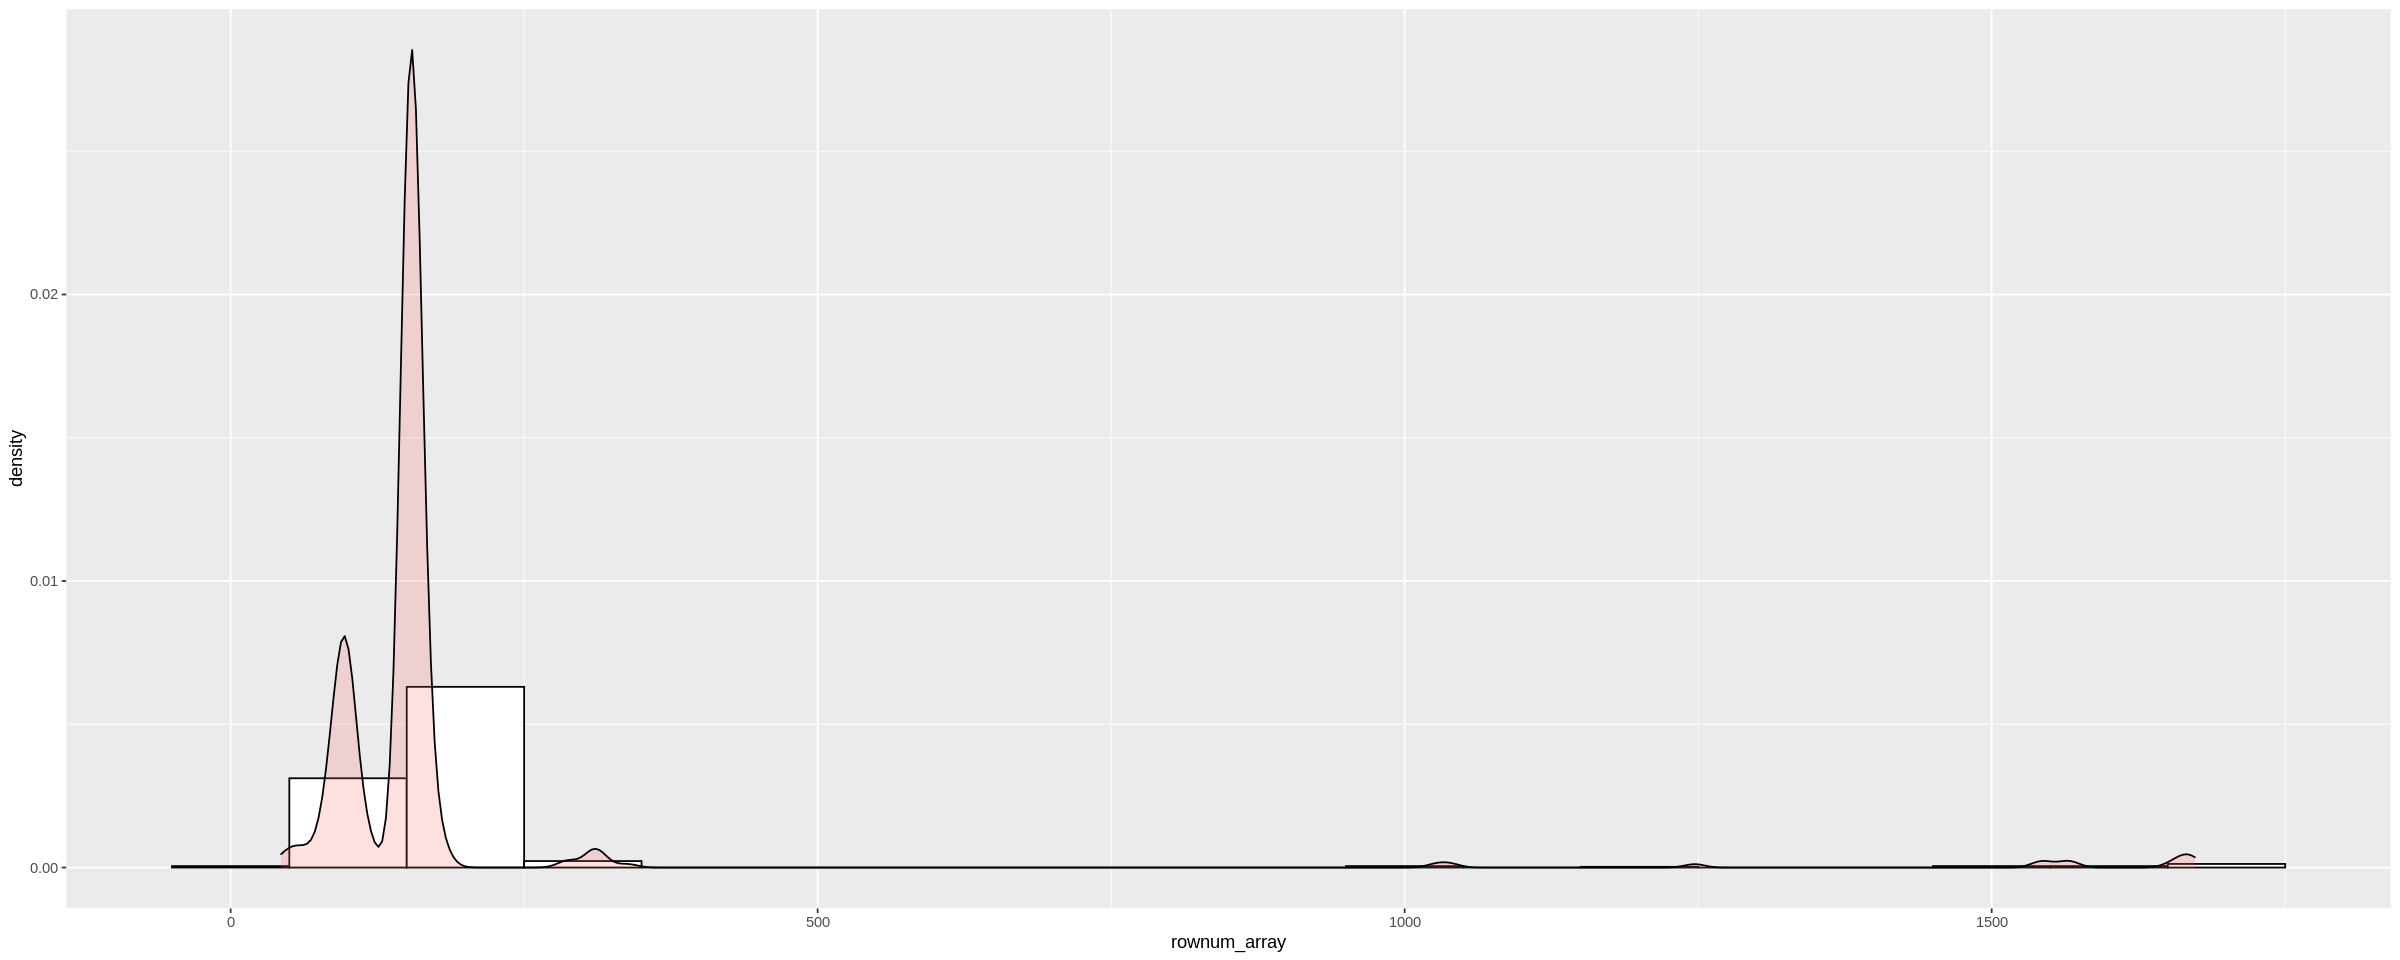

In [198]:
# look at the distribution of data length across different sites
summary(rownum_array)
options(repr.plot.width=20, repr.plot.height=8)
ggplot(data=as.data.frame(rownum_array), aes(x=rownum_array))+
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   colour="black", fill="white",binwidth = 100) +
    geom_density(alpha=.2, fill="#FF6666")
# there's a wide range of length of data
# to perform analysis, a large amount of data is preferable
# choose the site with the largest amount of data available

## Subset data

In [199]:
data <- filter(drink, Sample.Site=="1S03B")

## Explore subsetted data

In [200]:
str(data)  
# the date needs to be changed
# turbidity needs to be changed

'data.frame':	1673 obs. of  11 variables:
 $ Sample.Number                      : int  32374 32241 32102 32008 31879 31798 31701 31655 31463 31388 ...
 $ Sample.Date                        : chr  "2019-10-31T00:00:00.000" "2019-10-30T00:00:00.000" "2019-10-29T00:00:00.000" "2019-10-28T00:00:00.000" ...
 $ Sample.Time                        : chr  "10:10" "9:57" "10:10" "11:58" ...
 $ Sample.Site                        : chr  "1S03B" "1S03B" "1S03B" "1S03B" ...
 $ Sample.class                       : chr  "Operational" "Operational" "Operational" "Operational" ...
 $ Location                           : chr  "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O Shaft 2 building)" "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O Shaft 2 building)" "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O Shaft 2 building)" "SS - Shaft 3B of City Tunnel N

## Data cleaning

### Manipulate date

In [201]:
data$Sample.Date <- data$Sample.Date %>% as.Date()
str(data)  # it is now in date
# using as.Date, the time stamp is lost but the time stamp was not accurate 

'data.frame':	1673 obs. of  11 variables:
 $ Sample.Number                      : int  32374 32241 32102 32008 31879 31798 31701 31655 31463 31388 ...
 $ Sample.Date                        : Date, format: "2019-10-31" "2019-10-30" ...
 $ Sample.Time                        : chr  "10:10" "9:57" "10:10" "11:58" ...
 $ Sample.Site                        : chr  "1S03B" "1S03B" "1S03B" "1S03B" ...
 $ Sample.class                       : chr  "Operational" "Operational" "Operational" "Operational" ...
 $ Location                           : chr  "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O Shaft 2 building)" "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O Shaft 2 building)" "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O Shaft 2 building)" "SS - Shaft 3B of City Tunnel No.3 - Mosholu Ave W/O Jerome Ave (w/i Van Cortlandt Park ~200' SE/O S

In [202]:
length(unique(data$Sample.Date))

[1] 1672

### Manipulate the turbidity

In [203]:
unique(data$Turbidity..NTU.)  # there isn't any categorical entry

[1] "0.65" "0.84" "0.78" "0.63" "0.85" "0.60" "0.68" "0.64" "0.61" "0.62"
[11] "0.79" "0.98" "1.01" "0.66" "0.73" "0.75" "0.72" "0.70" "0.54" "0.67"
[21] "0.74" "0.76" "0.82" "0.69" "0.77" "0.81" "0.80" "0.71" "0.89" "0.58"
[31] "0.57" "0.59" "0.83" "0.87" "0.97" "0.91" "0.94" "0.99" "1.05" "0.92"
[41] "1.03" "1.06" "1.07" "1.14" "0.96" "0.95" "0.88" "0.86" "1.09" "0.90"
[51] "0.93" "1.11" "0.56" "0.53" "0.49" "1.00" "1.04" "1.08" "1.10" "1.15"
[61] "1.19" "1.23" "1.16" "1.20" "1.02" "1.13" "0.55" "0.47" "0.51" "0.8" 
[71] "1.12" "1.18" "0.9"  "0.7"  "1.21" "0.6"  "1"    "1.26" "0.44" "0.42"
[81] "0.52" "0.50" "0.45" "0.48" "1.22" "1.27" "1.24" "1.31" "1.29" "1.32"
[91] "1.30" "1.55"

In [204]:
data$Turbidity..NTU. <- as.numeric(data$Turbidity..NTU.)
class(data$Turbidity..NTU.)  # changed to numeric now

[1] "numeric"

### Manipulate Fluoride level

In [205]:
unique(data$Fluoride..mg.L.)  # doesn't look like there's any categorical entry or missing value

[1] "0.70"  "0.72"  "0.68"  "0.69"  "0.71"  "0.73"  "0.66"  "0.63"  "0.59" 
[10] "0.52"  "0.74"  "0.75"  "0.65"  "0.61"  "0.76"  "0.77"  "0.67"  "0.60" 
[19] "0.58"  "0.78"  ""      "0.64"  "0.54"  "0.62"  "0.49"  "0.43"  "0.41" 
[28] "0.56"  "0.46"  "0.7"   "0.45"  "0.31"  "0.04"  "0.05"  "0.06"  "0.08" 
[37] "0.1"   "0.13"  "0.23"  "0.37"  "0.684" "0.709" "0.707" "0.702" "0.688"
[46] "0.704" "0.678" "0.686" "0.701" "0.679" "0.674" "0.696" "0.698" "0.705"
[55] "0.711" "0.723" "0.699" "0.716" "0.714" "0.717" "0.706" "0.695" "0.8"  
[64] "0.6"   "0.53"  "0.81"  "0.82"  "0.83"  "0.84"  "0.85"  "0.79"  "0.80"

In [206]:
data$Fluoride..mg.L. <- as.numeric(data$Fluoride..mg.L.)
class(data$Fluoride..mg.L.)

[1] "numeric"

### Subset To only columns of Interest

We're going to only look at a few columns for the purpose of time series analysis. Specifically, we'll be looking at chlorine residual, the turbidity and the fluoride level.

https://www.cdc.gov/safewater/chlorine-residual-testing.html

In [207]:
# subset the data by columns
cols_of_interest <- c("Sample.Date","Residual.Free.Chlorine..mg.L.", "Turbidity..NTU.", "Fluoride..mg.L.")
data_subset <- data.frame(data[,cols_of_interest])
head(data_subset)

Sample.Date Residual.Free.Chlorine..mg.L. Turbidity..NTU. Fluoride..mg.L.
1 2019-10-31  0.81                          0.65            0.70           
2 2019-10-30  0.77                          0.84            0.70           
3 2019-10-29  0.65                          0.78            0.70           
4 2019-10-28  0.81                          0.63            0.72           
5 2019-10-27  0.59                          0.65            0.70           
6 2019-10-26  0.68                          0.85            0.70

### Handle date order and duplicated date

In [208]:
# reorder the data
data_subset <- data_subset[order(data_subset$Sample.Date),]
head(data_subset)  # it's in the correct order

Sample.Date Residual.Free.Chlorine..mg.L. Turbidity..NTU. Fluoride..mg.L.
1673 2015-01-01  0.77                          0.93            0.80           
1672 2015-01-02  0.81                          0.98            0.83           
1671 2015-01-03  0.74                          1.12            0.81           
1670 2015-01-04  0.90                          0.99            0.81           
1669 2015-01-05  0.87                          1.08            0.81           
1668 2015-01-06  0.84                          1.13            0.85

In [209]:
# find duplicate in date
data_subset[duplicated(data_subset$Sample.Date, fromLast = TRUE) | duplicated(data_subset$Sample.Date),]
# there are two duplicates in the data

Sample.Date Residual.Free.Chlorine..mg.L. Turbidity..NTU. Fluoride..mg.L.
456 2018-08-01  0.61                          0.66            0.74           
457 2018-08-01  0.61                          0.66            0.74

In [210]:
# remove the duplicate
data_subset <- data.frame(data_subset[!duplicated(data_subset$Sample.Date),])
colnames(data_subset)[1] <- "Date"
head(data_subset)

Date       Residual.Free.Chlorine..mg.L. Turbidity..NTU. Fluoride..mg.L.
1673 2015-01-01 0.77                          0.93            0.80           
1672 2015-01-02 0.81                          0.98            0.83           
1671 2015-01-03 0.74                          1.12            0.81           
1670 2015-01-04 0.90                          0.99            0.81           
1669 2015-01-05 0.87                          1.08            0.81           
1668 2015-01-06 0.84                          1.13            0.85

### Explore Missing values

In [211]:
# are there any missing values?
cat("Any missing value: ", naniar::any_na(data_subset), "\n")

# How many missing values?
cat("Number of missing values:", naniar::n_miss(data_subset),"\n")
cat("Percentage of missing values: ", naniar::pct_miss(data_subset), "\n")

# Get number of missings per variable (n and %)
miss_var_table_df <- miss_var_summary(data_subset)
miss_var_table_df  
# looks like there are 8 missing values for Fluoride
# we could deal with that later

Any missing value:  TRUE 
Number of missing values: 8 
Percentage of missing values:  0.1196172 


variable                      n_miss pct_miss 
1 Fluoride..mg.L.               8      0.4784689
2 Date                          0      0.0000000
3 Residual.Free.Chlorine..mg.L. 0      0.0000000
4 Turbidity..NTU.               0      0.0000000

In [212]:
# are there any missing dates?
date_range <- seq(min(data_subset$Date), max(data_subset$Date),1)
date_range[!date_range %in% data_subset$Date]  # 2016 is missing March, October, 2018 is missing April

[1] "2016-03-01" "2016-03-02" "2016-03-03" "2016-03-04" "2016-03-05"
 [6] "2016-03-06" "2016-03-07" "2016-03-08" "2016-03-09" "2016-03-10"
[11] "2016-03-11" "2016-03-12" "2016-03-13" "2016-03-14" "2016-03-15"
[16] "2016-03-16" "2016-03-17" "2016-03-18" "2016-03-19" "2016-03-20"
[21] "2016-03-21" "2016-03-22" "2016-03-23" "2016-03-24" "2016-03-25"
[26] "2016-03-26" "2016-03-27" "2016-03-28" "2016-03-29" "2016-03-30"
[31] "2016-03-31" "2016-10-01" "2016-10-02" "2016-10-03" "2016-10-04"
[36] "2016-10-05" "2016-10-06" "2016-10-07" "2016-10-08" "2016-10-09"
[41] "2016-10-10" "2016-10-11" "2016-10-12" "2016-10-13" "2016-10-14"
[46] "2016-10-15" "2016-10-16" "2016-10-17" "2016-10-18" "2016-10-19"
[51] "2016-10-20" "2016-10-21" "2016-10-22" "2016-10-23" "2016-10-24"
[56] "2016-10-25" "2016-10-26" "2016-10-27" "2016-10-28" "2016-10-29"
[61] "2016-10-30" "2016-10-31" "2018-04-01" "2018-04-02" "2018-04-03"
[66] "2018-04-04" "2018-04-05" "2018-04-06" "2018-04-07" "2018-04-08"
[71] "2018-04-09" "2018-04-10" "2018-04-11" "2018-04-12" "2018-04-13"
[76] "2018-04-14" "2018-04-15" "2018-04-16" "2018-04-17" "2018-04-18"
[81] "2018-04-19" "2018-04-20" "2018-04-21" "2018-04-22" "2018-04-23"
[86] "2018-04-24" "2018-04-25" "2018-04-26" "2018-04-27" "2018-04-28"
[91] "2018-04-29" "2018-04-30" "2019-03-18"

In [214]:
nrow(data_subset)

[1] 1672

In [225]:
# create entries for the missing dates
data_subset <- data_subset %>% tidyr::complete(Date = seq.Date(min(Date), max(Date), by=1))
nrow(data_subset)

[1] 1765

### As ts object

In [226]:
# as ts
data_subset_ts <- ts(data_copy[,-1], start=c(2015,1), frequency = 365)
fluoride <- ts(data_subset$Fluoride..mg.L., start=c(2015,1), frequency = 365)
turbidity <- ts(data_subset$Turbidity..NTU., start=c(2015,1), frequency = 365)
chlorine <- ts(data_subset$Residual.Free.Chlorine..mg.L., start=c(2015,1), frequency = 365)

### Handle Missing Values

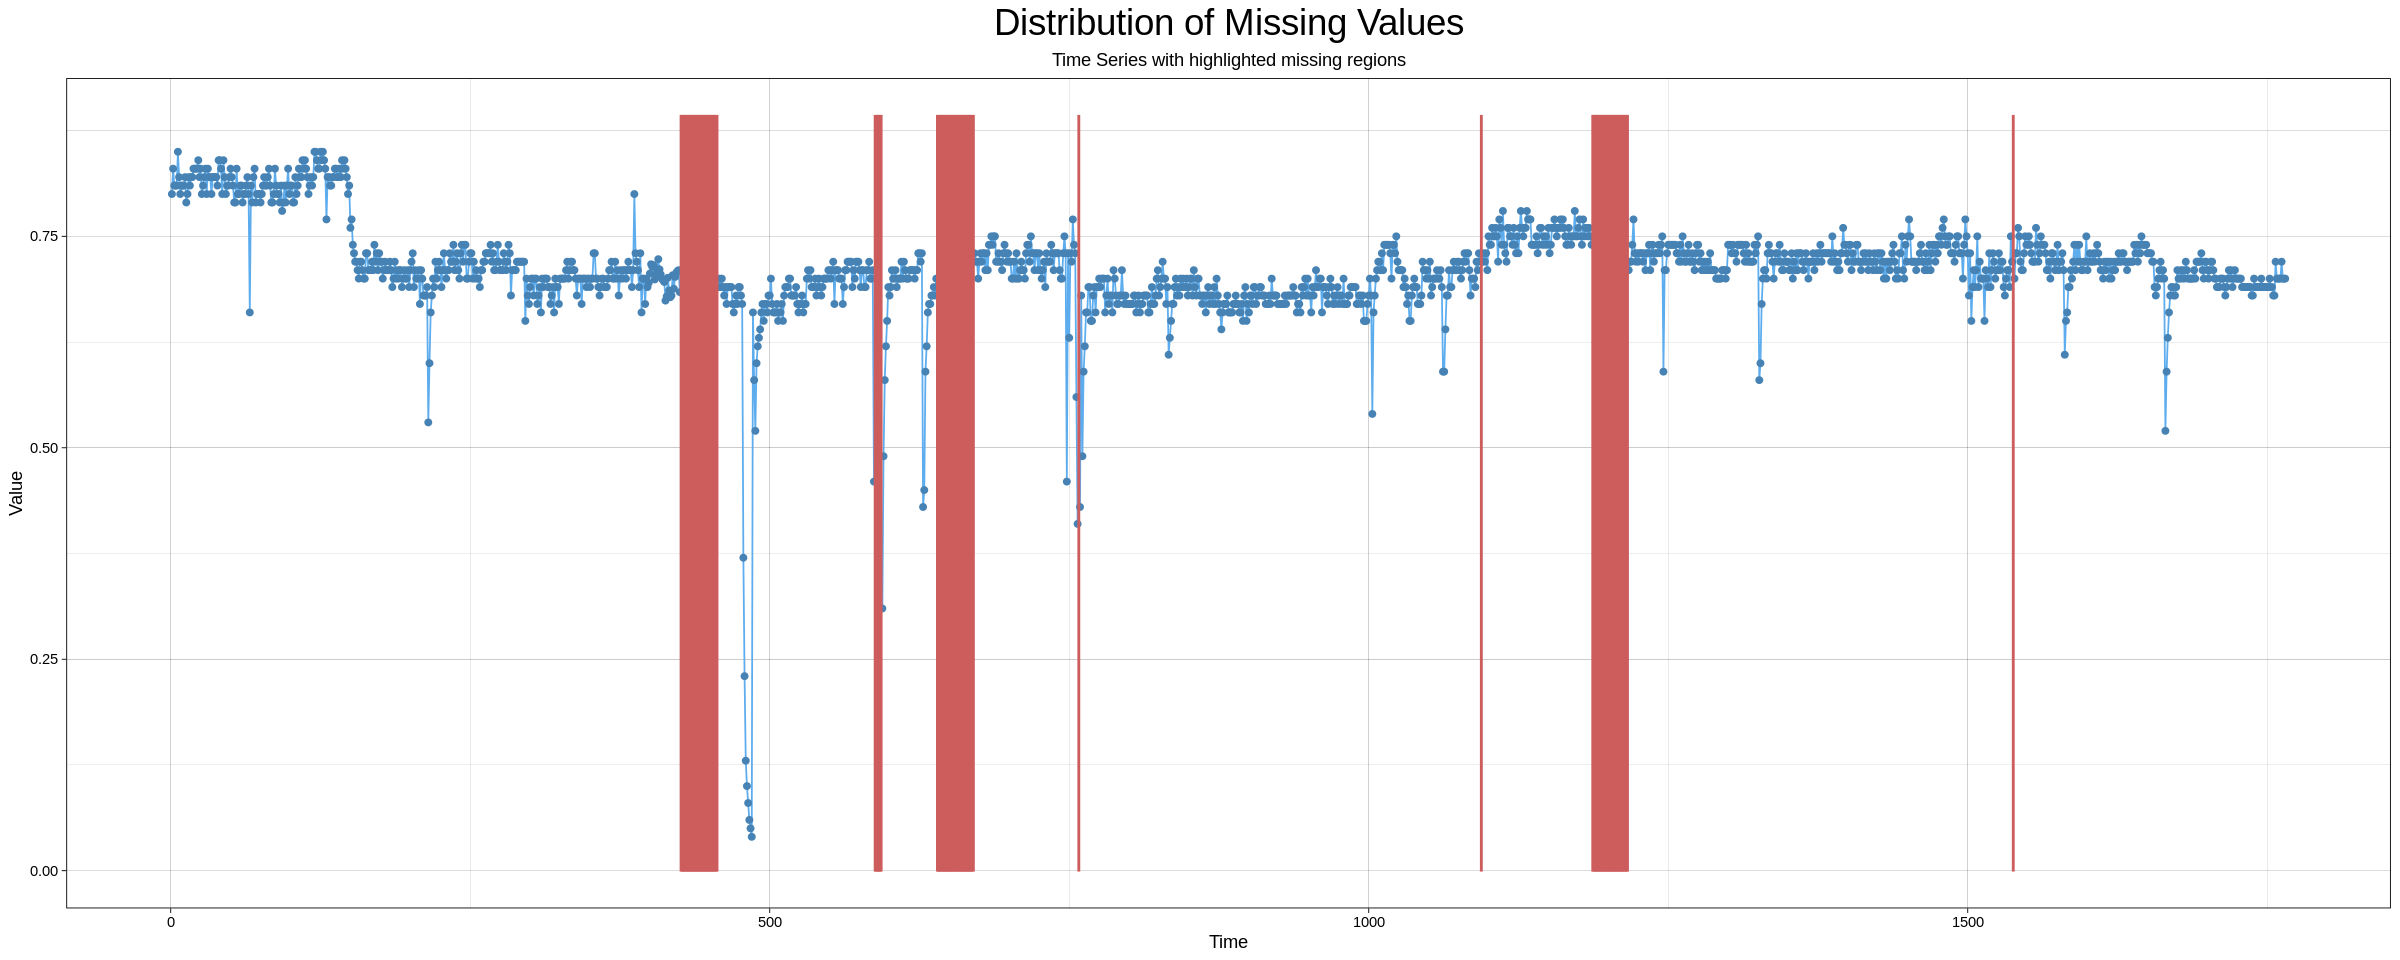

In [227]:
# visualise missing values in Fluoride
ggplot_na_distribution(fluoride) +
    ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size=22)) +
    ggplot2::theme(plot.subtitle = ggplot2::element_text(hjust = 0.5))

In [228]:
# impute missing values using different technique
fl_locf <- na_locf(fluoride)  # using forward fill
fl_mean <- na_mean(fluoride)  # using mean
fl_exp <- na_ma(fluoride, weighting = "exponential")  # using exponential weighted moving average
fl_spline <- na_interpolation(fluoride, option="spline")  # using spline interpolation
fl_stine <- na_interpolation(fluoride, option = "stine")  # using stineman interpolation
fl_linear <- na_interpolation(fluoride, option = "linear")  # using linear interpolation
fl_seadec <- na_seadec(fluoride)  # use seasonal decompostion
fl_seasplit <- na_seasplit(fluoride)  # use seasonally splitted

In [229]:
# create a function to visualise the imputed results  # created this function a while ago
viz_impute <- function(original, imputed, title_size, title){
    tmp <- ggplot_na_imputations(original, imputed, title=title) +
                ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size=title_size)) +
                ggplot2::theme(plot.subtitle = ggplot2::element_text(hjust = 0.5))
    return(tmp)
}

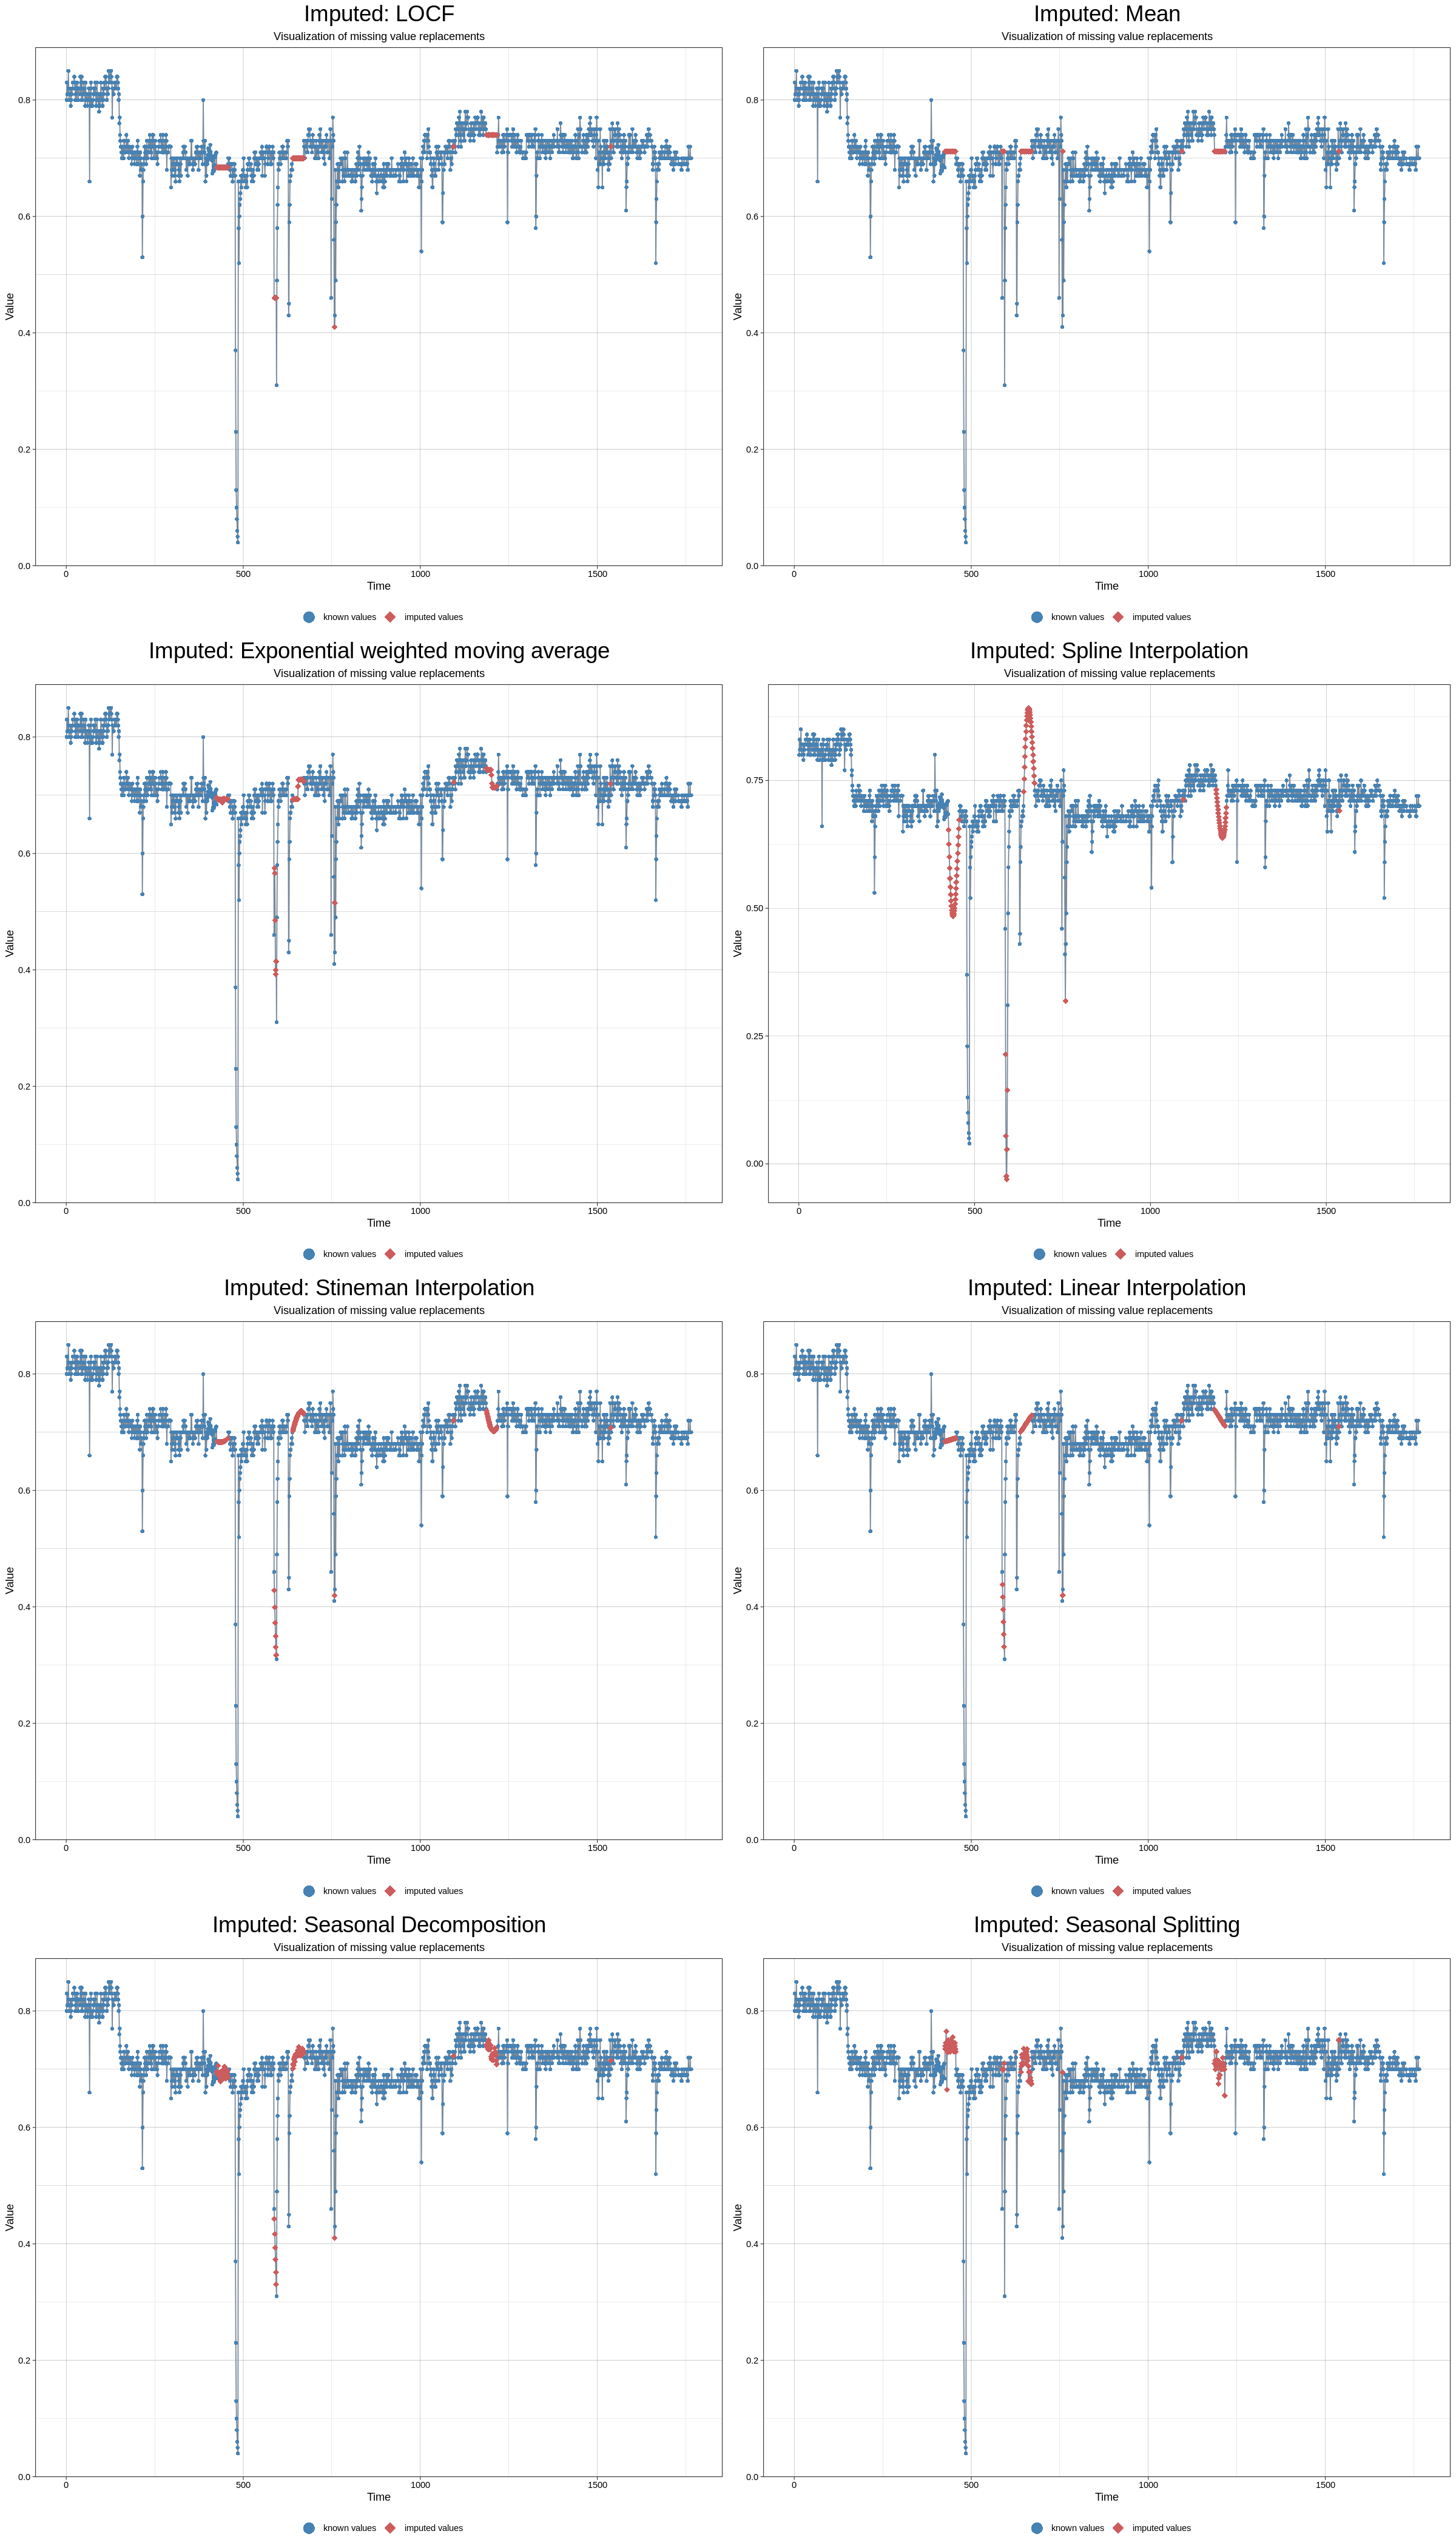

In [230]:
# visualise imputed value
options(repr.plot.width=20, repr.plot.height=35) 
# plot1 <- viz_impute(original=luco_output_ts, luco_output_nocb, 22, title="Imputed Values: NOCB")
plot1 <- viz_impute(fluoride, fl_locf, 22, "Imputed: LOCF")
plot2 <- viz_impute(fluoride, fl_mean, 22, "Imputed: Mean")
plot3 <- viz_impute(fluoride, fl_exp, 22, "Imputed: Exponential weighted moving average")
plot4 <- viz_impute(fluoride, fl_spline, 22, "Imputed: Spline Interpolation")
plot5 <- viz_impute(fluoride, fl_stine, 22, "Imputed: Stineman Interpolation")
plot6 <- viz_impute(fluoride, fl_linear, 22, "Imputed: Linear Interpolation")
plot7 <- viz_impute(fluoride, fl_seadec, 22, "Imputed: Seasonal Decomposition")
plot8 <- viz_impute(fluoride, fl_seasplit, 22, "Imputed: Seasonal Splitting")
grid.arrange(plot1, plot2,plot3,plot4, plot5, plot6, plot7, plot8, ncol=2 )  

Looking at the visualisation of the imputations from different methods, the contenders would be stineman interpolation, linear interpolation and seasonal decomposition. Last observation carried forward and exponential weighted moving average both have believable patterns. Given that this project is concerned with outlier detection, most of these methods still shows possible outliers. For now, seasonal decomposition is the method to be used for it. This shall be the method to impute the missing values for the other series.

In [240]:
# replace missing values
data_subset_seadec_df<- data.frame(na_seadec(data_subset_ts))
data_subset_seadec_df["Date"] <- data_subset$Date
head(data_subset_seadec_df)
data_subset_ts <- ts(data_subset_seadec_df[,-4], start=c(2015,1), frequency=365)  # multivariate

# turn them into univariate ts object again
fluoride <- ts(data_subset_seadec_df$Fluoride..mg.L., start=c(2015,1), frequency = 365)
turbidity <- ts(data_subset_seadec_df$Turbidity..NTU., start=c(2015,1), frequency = 365)
chlorine <- ts(data_subset_seadec_df$Residual.Free.Chlorine..mg.L., start=c(2015,1), frequency = 365)

Residual.Free.Chlorine..mg.L. Turbidity..NTU. Fluoride..mg.L. Date      
1 0.77                          0.93            0.80            2015-01-01
2 0.81                          0.98            0.83            2015-01-02
3 0.74                          1.12            0.81            2015-01-03
4 0.90                          0.99            0.81            2015-01-04
5 0.87                          1.08            0.81            2015-01-05
6 0.84                          1.13            0.85            2015-01-06

## Exploratory analysis

In [107]:
summary(data_subset)  
# turbidity: looks like it might have an outlier at the max of 1.55?
# fluoride: looks like the min could be an outlier

      Date            Residual.Free.Chlorine..mg.L. Turbidity..NTU. 
 Min.   :2015-01-01   Min.   :0.3400                Min.   :0.4200  
 1st Qu.:2016-02-22   1st Qu.:0.6900                1st Qu.:0.6800  
 Median :2017-06-16   Median :0.7600                Median :0.7600  
 Mean   :2017-06-07   Mean   :0.7629                Mean   :0.7841  
 3rd Qu.:2018-09-07   3rd Qu.:0.8200                3rd Qu.:0.8700  
 Max.   :2019-10-31   Max.   :1.1600                Max.   :1.5500  
 Fluoride..mg.L. 
 Min.   :0.0400  
 1st Qu.:0.6900  
 Median :0.7100  
 Mean   :0.7105  
 3rd Qu.:0.7300  
 Max.   :0.8500  

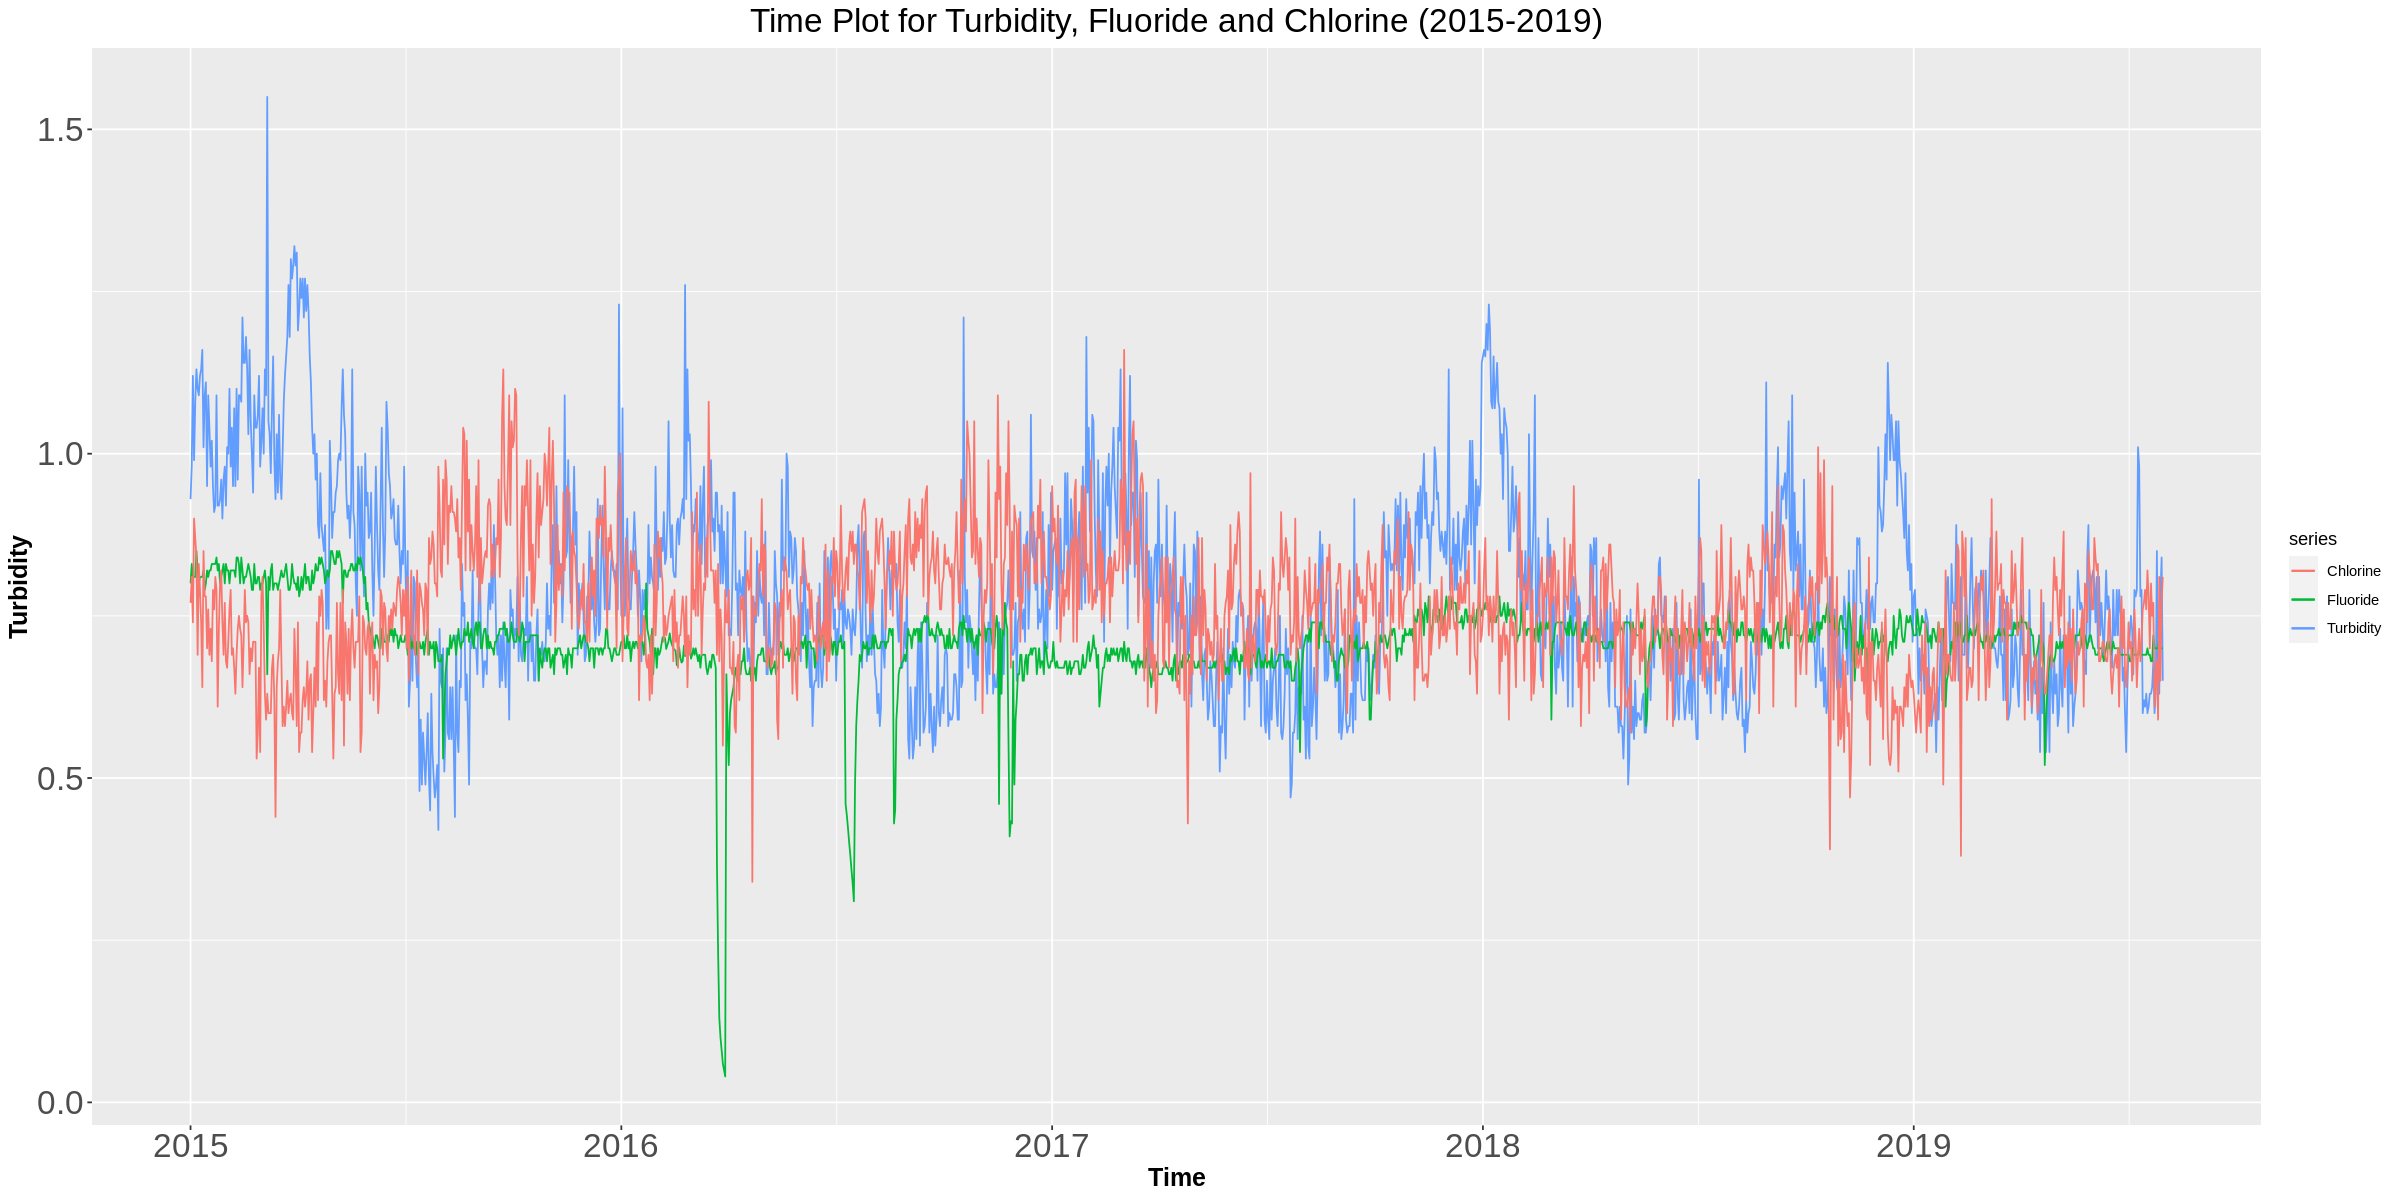

In [108]:
options(repr.plot.width=20, repr.plot.height=10)
autoplot(turbidity, series = "Turbidity") +
    autolayer(fluoride, series = "Fluoride") +
    autolayer(chlorine, series = "Chlorine") +
    ggtitle("Time Plot for Turbidity, Fluoride and Chlorine (2015-2019)") +
    ylab("Turbidity") + 
    theme(axis.text=element_text(size=20),
        axis.title=element_text(size=15,face="bold"),
         plot.title = element_text(hjust = 0.5, size=20))
# looks like Chlorine and Turbidity might be correlated

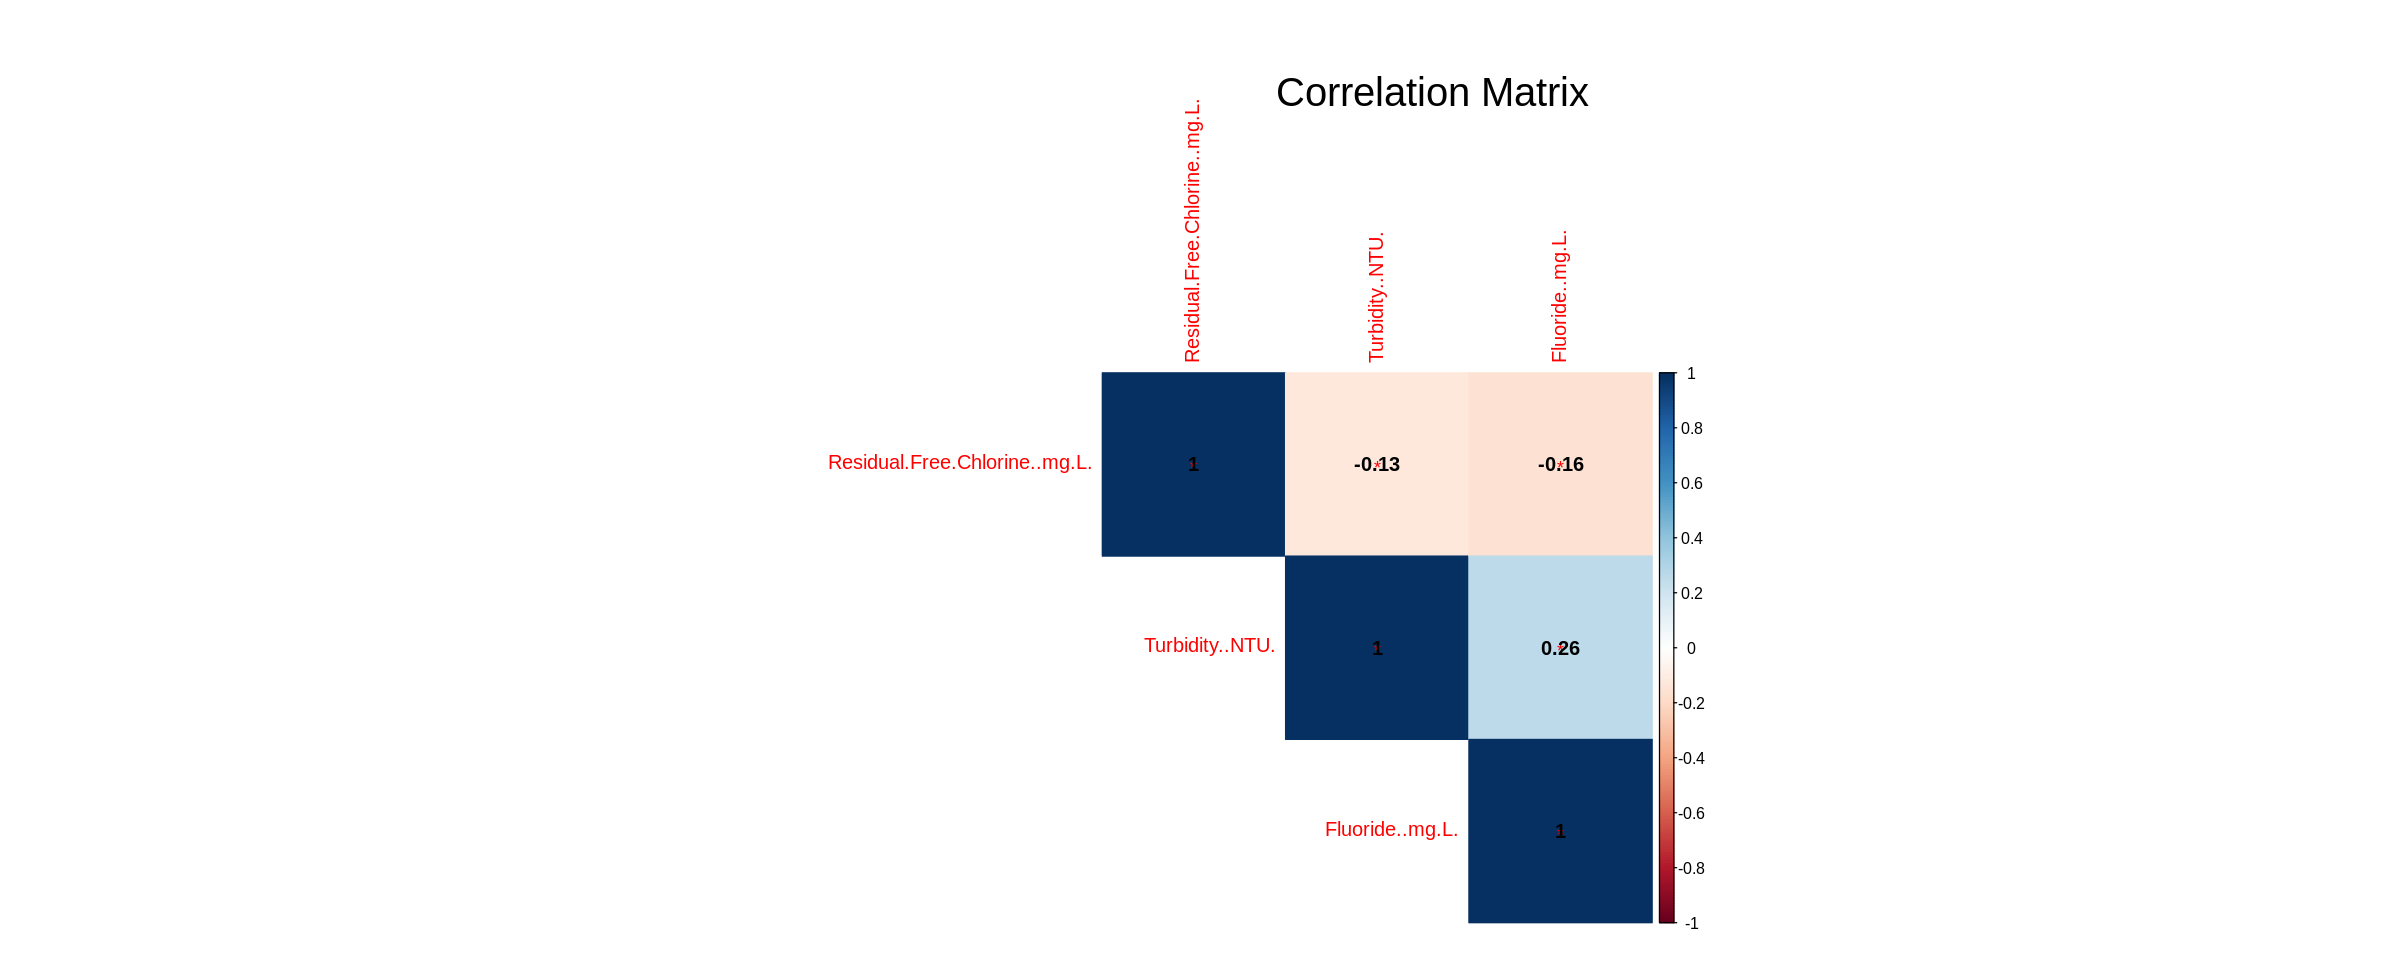

In [115]:
# correlation
options(repr.plot.width=20, repr.plot.height=8)
cormat <- round(cor(data_subset[,-1], use = "pairwise.complete.obs"),2)
res1 <- cor.mtest(data_subset[,-1], conf.level = .95)
corrplot::corrplot(cormat, p.mat = res1$p, method = "color", type = "upper",
         sig.level = 0.05, pch.cex = .9, addCoef.col = "black", 
         insig = "label_sig", pch.col = "red", order = "AOE")
mtext("Correlation Matrix", at=2.3, line=-0.5, cex=2)
# surprise that Turbidity and Chlorine is weakly correlated and weakly, too
# suppose it makes sense tho, as higher chlorine leads to less bacteria growth and so lower turbidity

In [116]:
# seasonality
seastests::isSeasonal(turbidity)
seastests::isSeasonal(chlorine)
seastests::isSeasonal(fluoride)
# doesn't seem like any of them has seasonality to them
# which is weird because there is almost a regular trend like pattern to turbidity

[1] FALSE

[1] FALSE

[1] FALSE

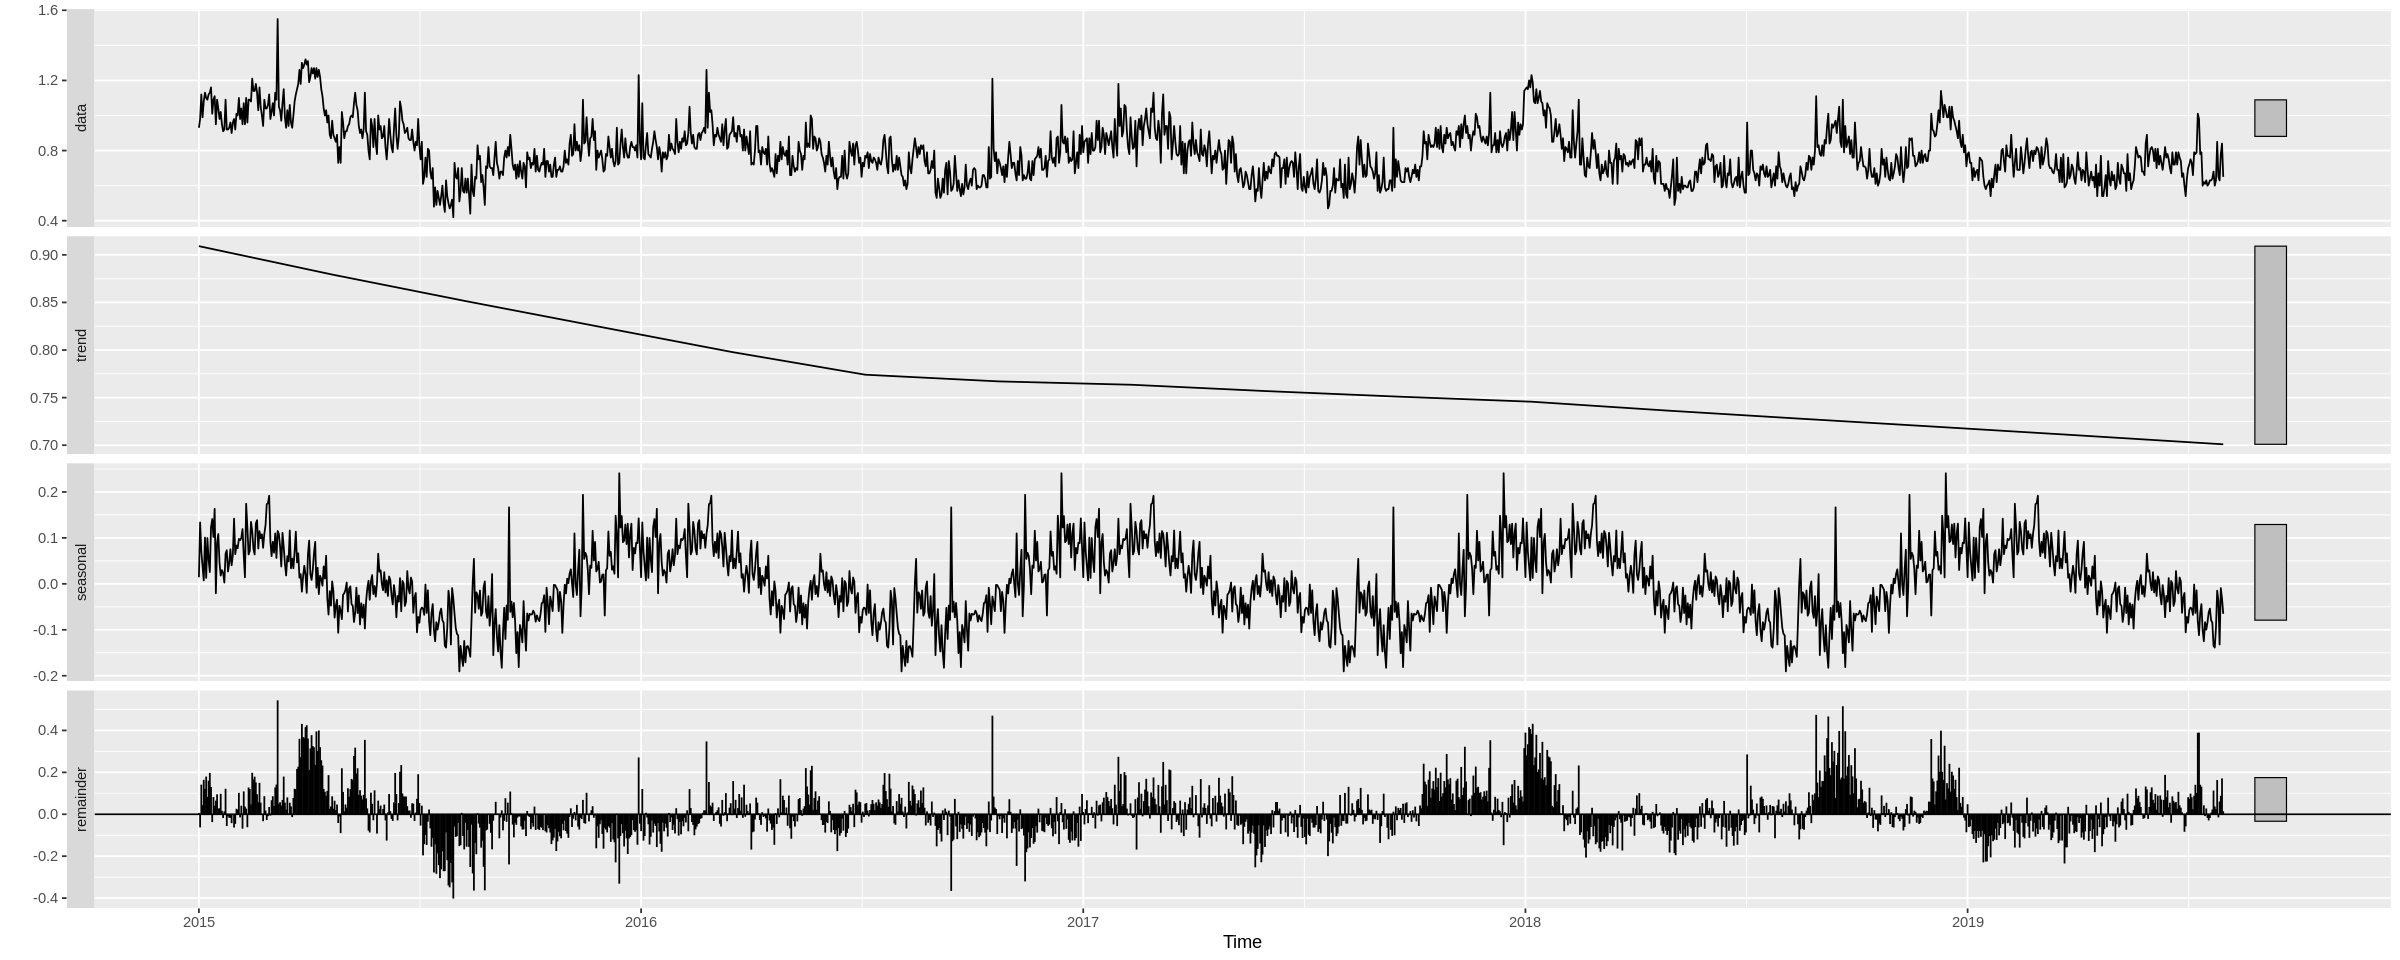

In [117]:
turbidity %>% stl(t.window = 365*3, s.window=365*5, robust=TRUE) %>% autoplot()  
# reason for setting s.window: https://stats.stackexchange.com/questions/43398/criteria-to-set-stl-s-window-width
# https://stats.stackexchange.com/questions/9506/stl-trend-of-time-series-using-r

Personally, I think there is a seasonality to turbidity. While seastest might disagree, I think the reason is because there are not enough seasonal data to show that there is a seasonality to it. While Chlorine and Turbidity seems like they might be correlated, I am surprised that they are very weakly, negatively correlated only.

## Anomaly detection

Using `summary`, we could get a general overview of the distribution of the data. This gives us a idea of possible outliers/ anomalies in the data. To find out more possible outliers however, we'll need more sophisticated methods.

### Using anomalize

#### Anomalize: STL decomposition on Turbidity

In [241]:
# turn data subset into tibbletime object
# data_subset["Date"] <- as.Date(row.names(data_subset))
data_subset_tibble <- tibbletime::as_tbl_time(data_subset_seadec_df, Date)

In [243]:
# turn turbidity into tibble object to find the frequency of the data
turbidity_tibble <- tibble::tibble(time=data_subset_seadec_df$Date, value=data_subset_seadec_df$Turbidity..NTU.)
turbidity_tbl <- as_tbl_time(turbidity_tibble, time)
time_frequency(turbidity_tibble)

frequency = 7 days



[1] 7

frequency = 365 days

trend = 91 days

frequency = 365 days

median_span = 93 days



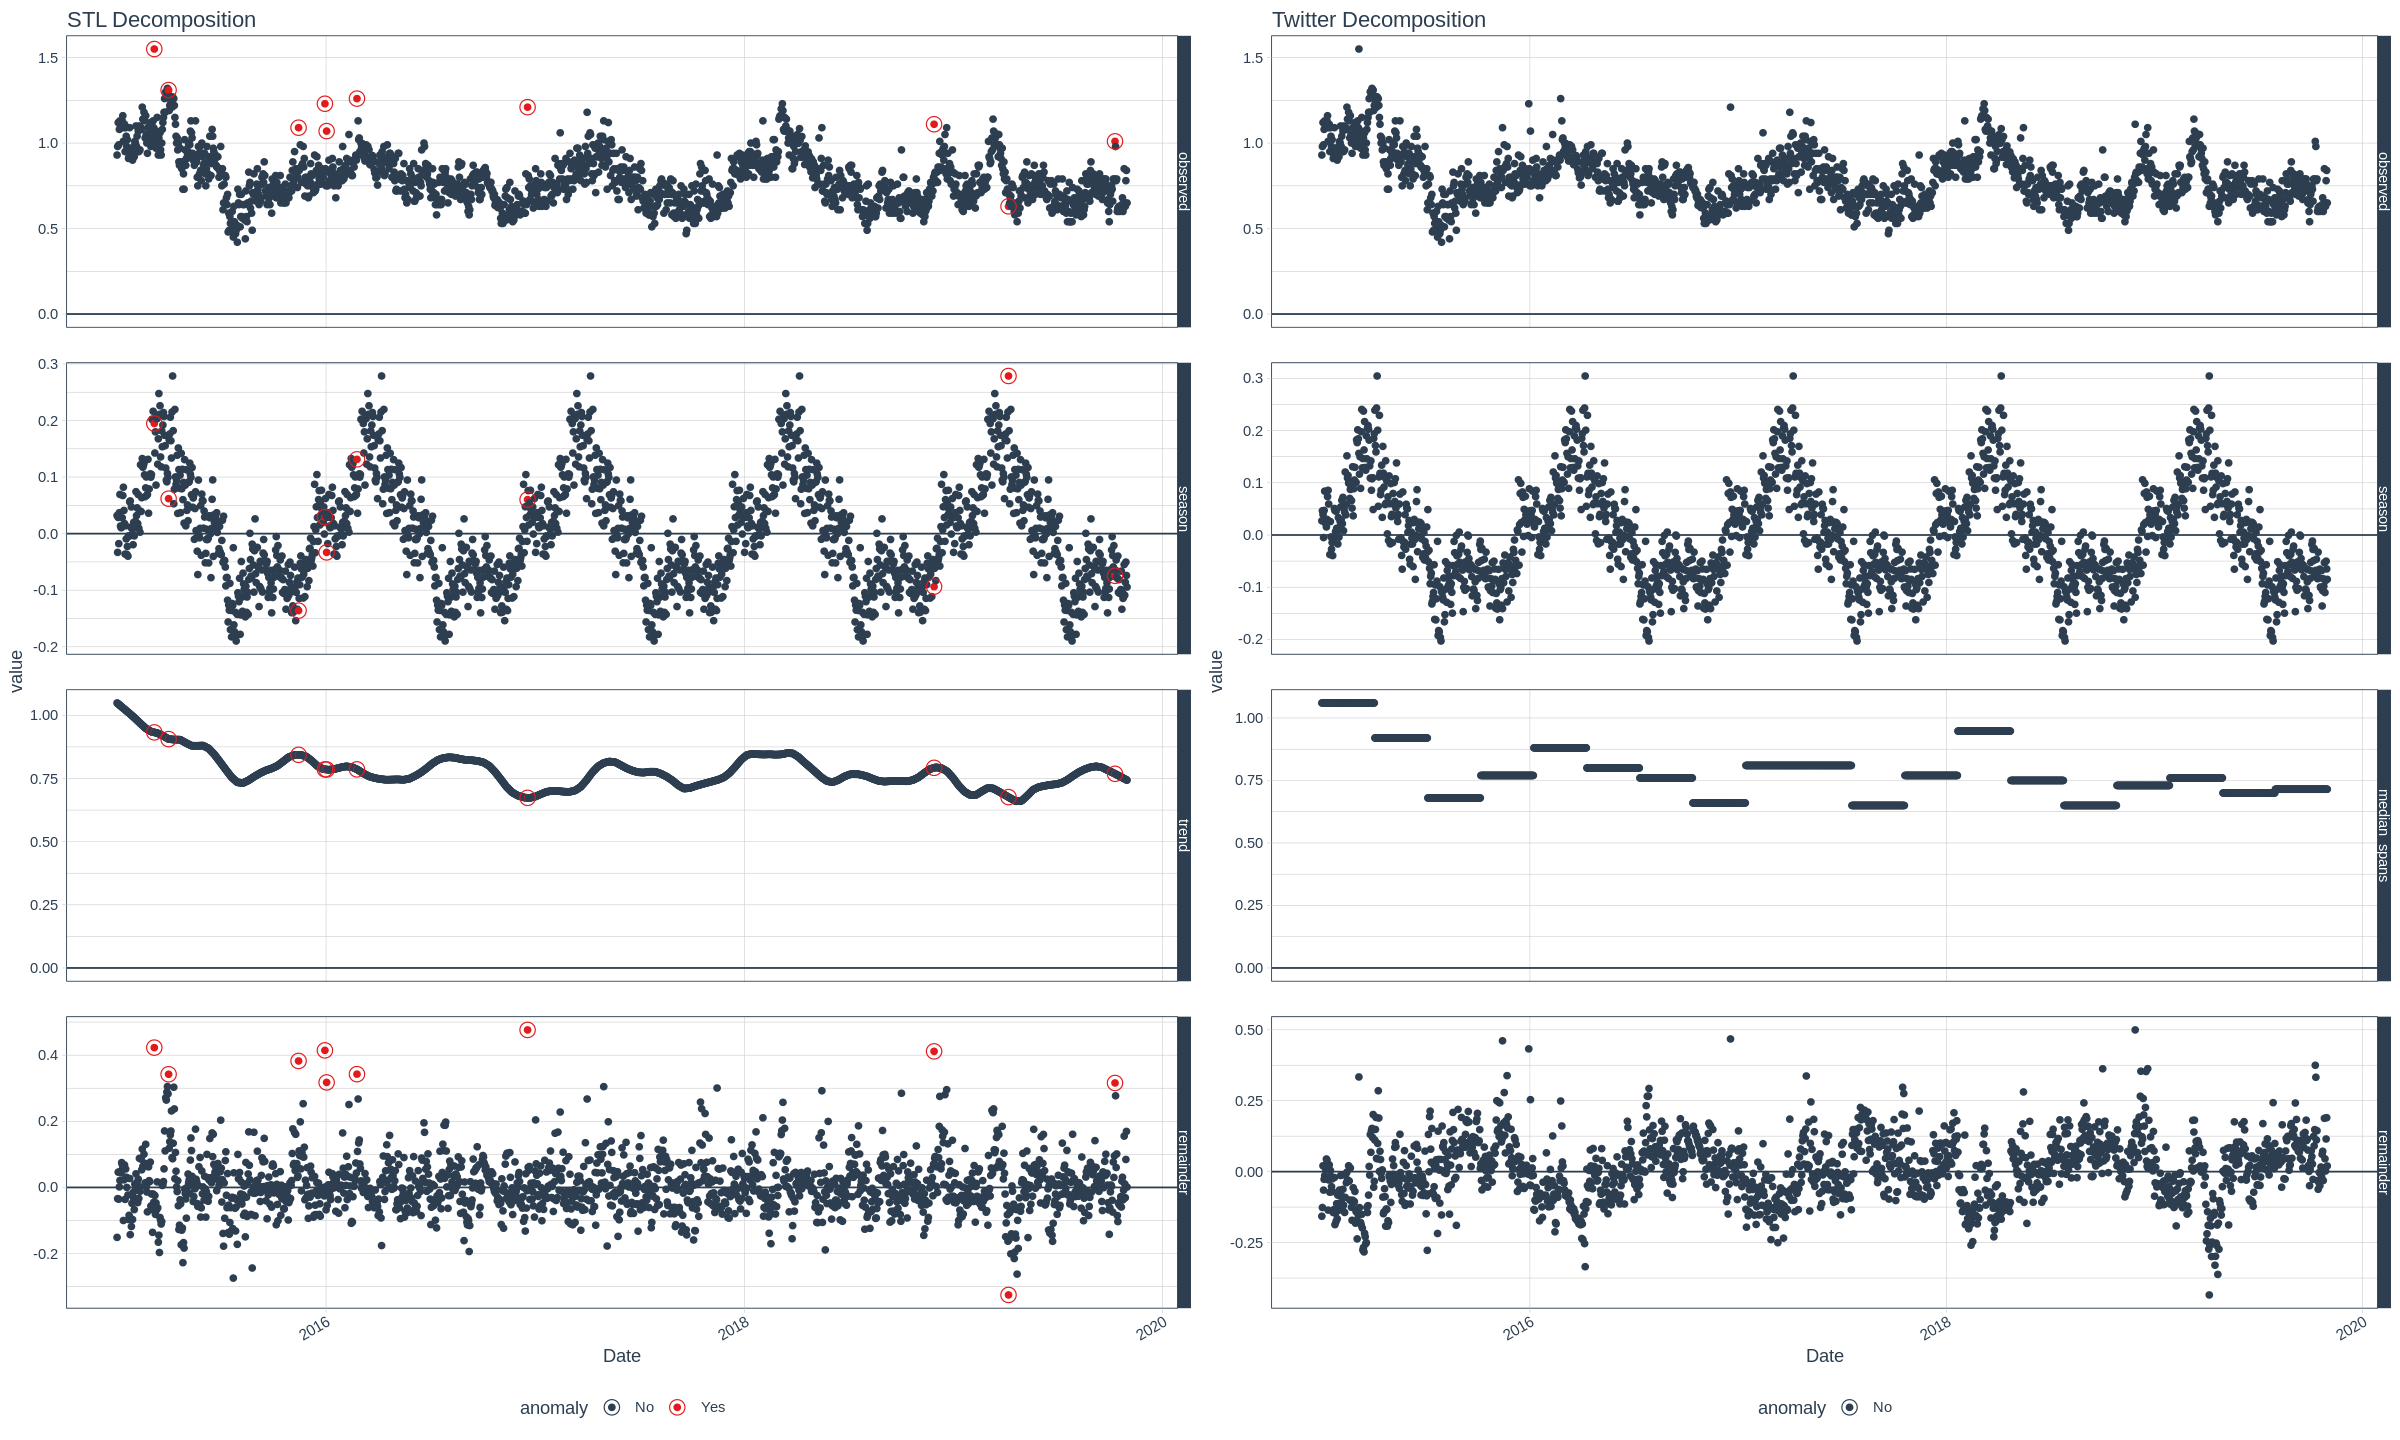

In [244]:
# use the stl decomposition
options(repr.plot.width=20, repr.plot.height=12)
p1 <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="stl",
                    frequency = "1 year") %>%
        anomalize(remainder) %>%
        plot_anomaly_decomposition() +
        ggtitle("STL Decomposition")

# use twitter decomposition
p2 <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="twitter",
                    frequency = "1 year") %>%
        anomalize(remainder) %>%
        plot_anomaly_decomposition() +
        ggtitle("Twitter Decomposition")

grid.arrange(p1,p2, ncol=2)  # I'm not sure if I like the output, see if I could visualise it differently

In [245]:
# recompose the turbidity
ano_turbidity <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="stl",
                    frequency = "1 year") %>%
                anomalize(remainder, method="gesd") %>%
                time_recompose()

frequency = 365 days

trend = 91 days



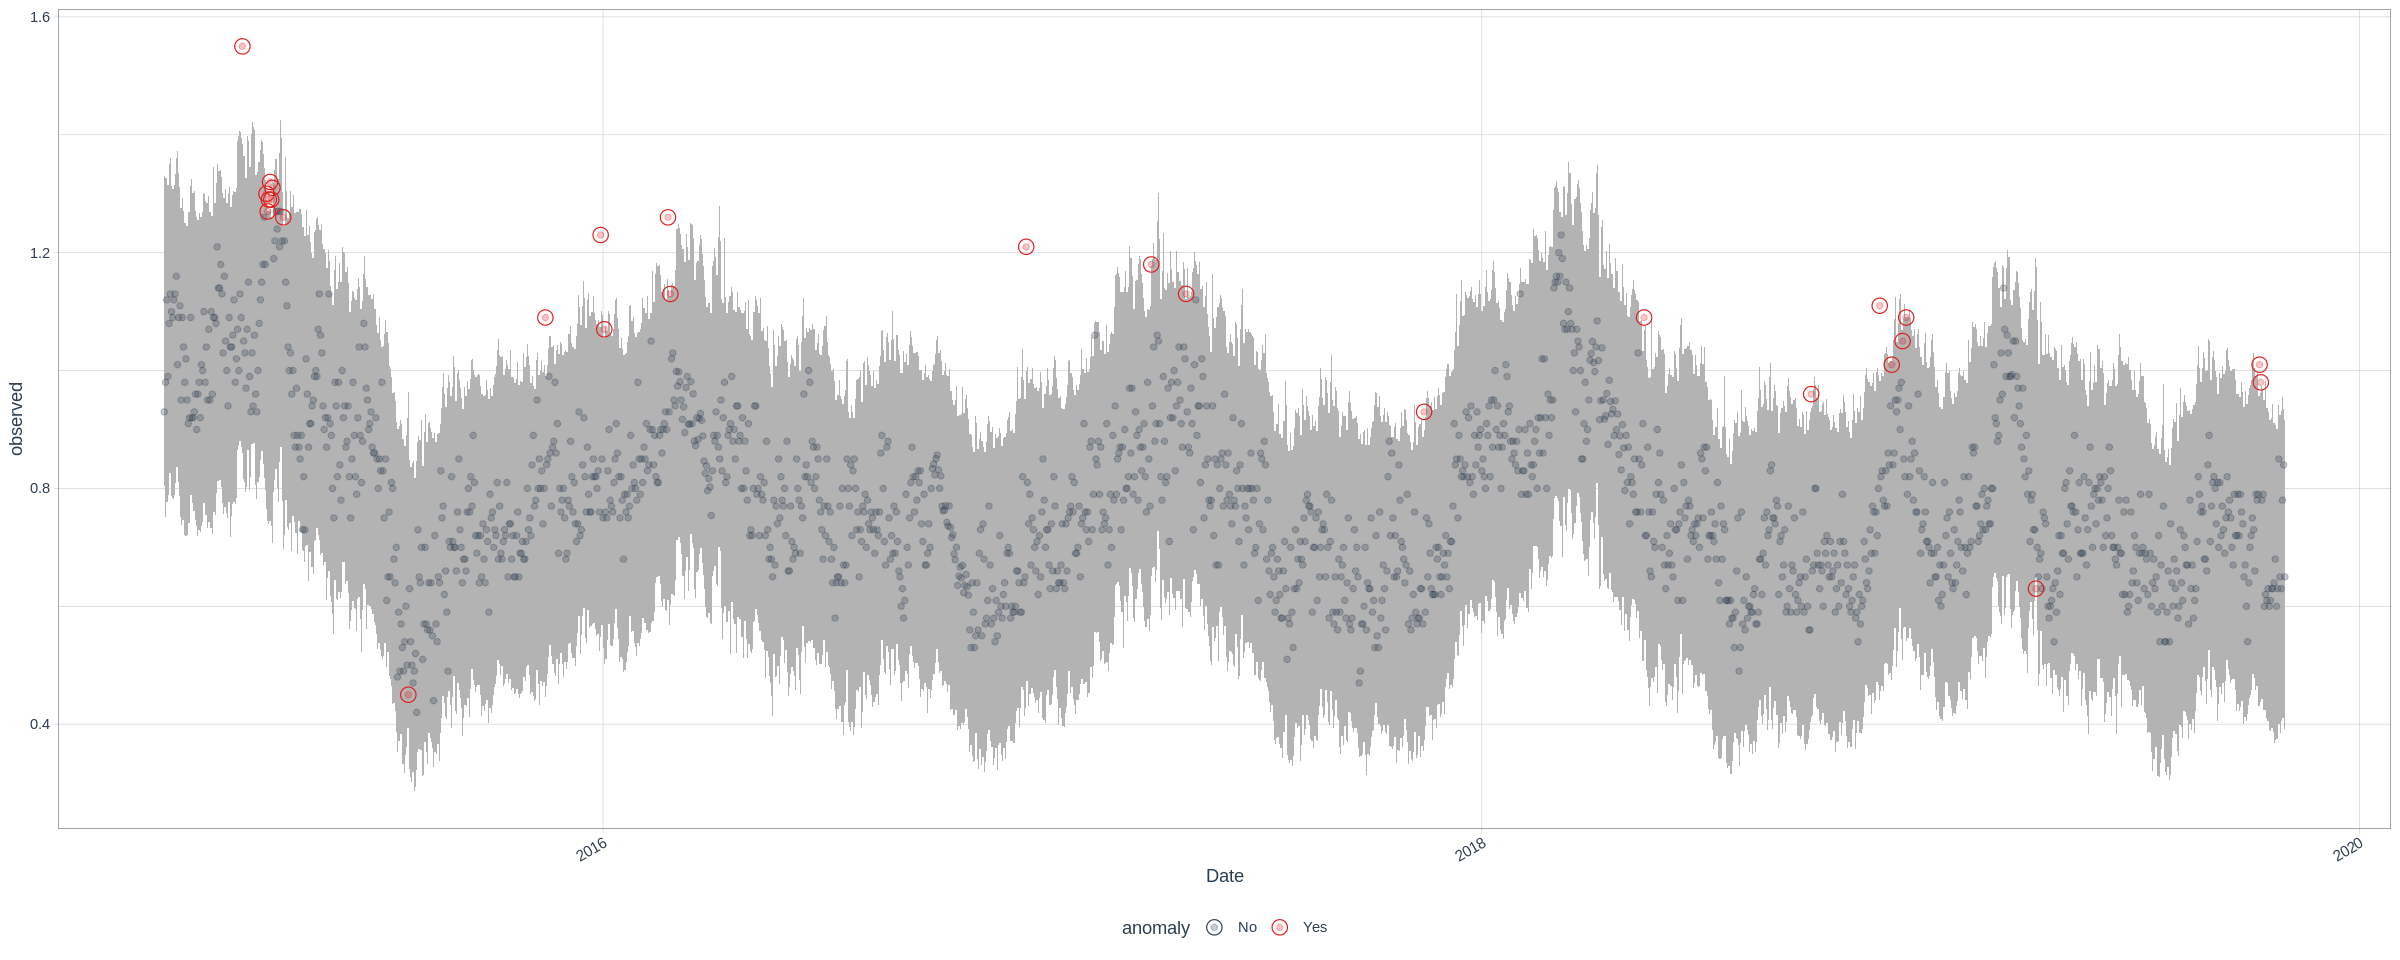

In [246]:
# plot the anomaly of the time series
options(repr.plot.width=20, repr.plot.height=8)
ano_turbidity %>%
    plot_anomalies(time_recomposed = TRUE, ncol=4, alpha_dots = 0.25)
# not a big fan of the plot

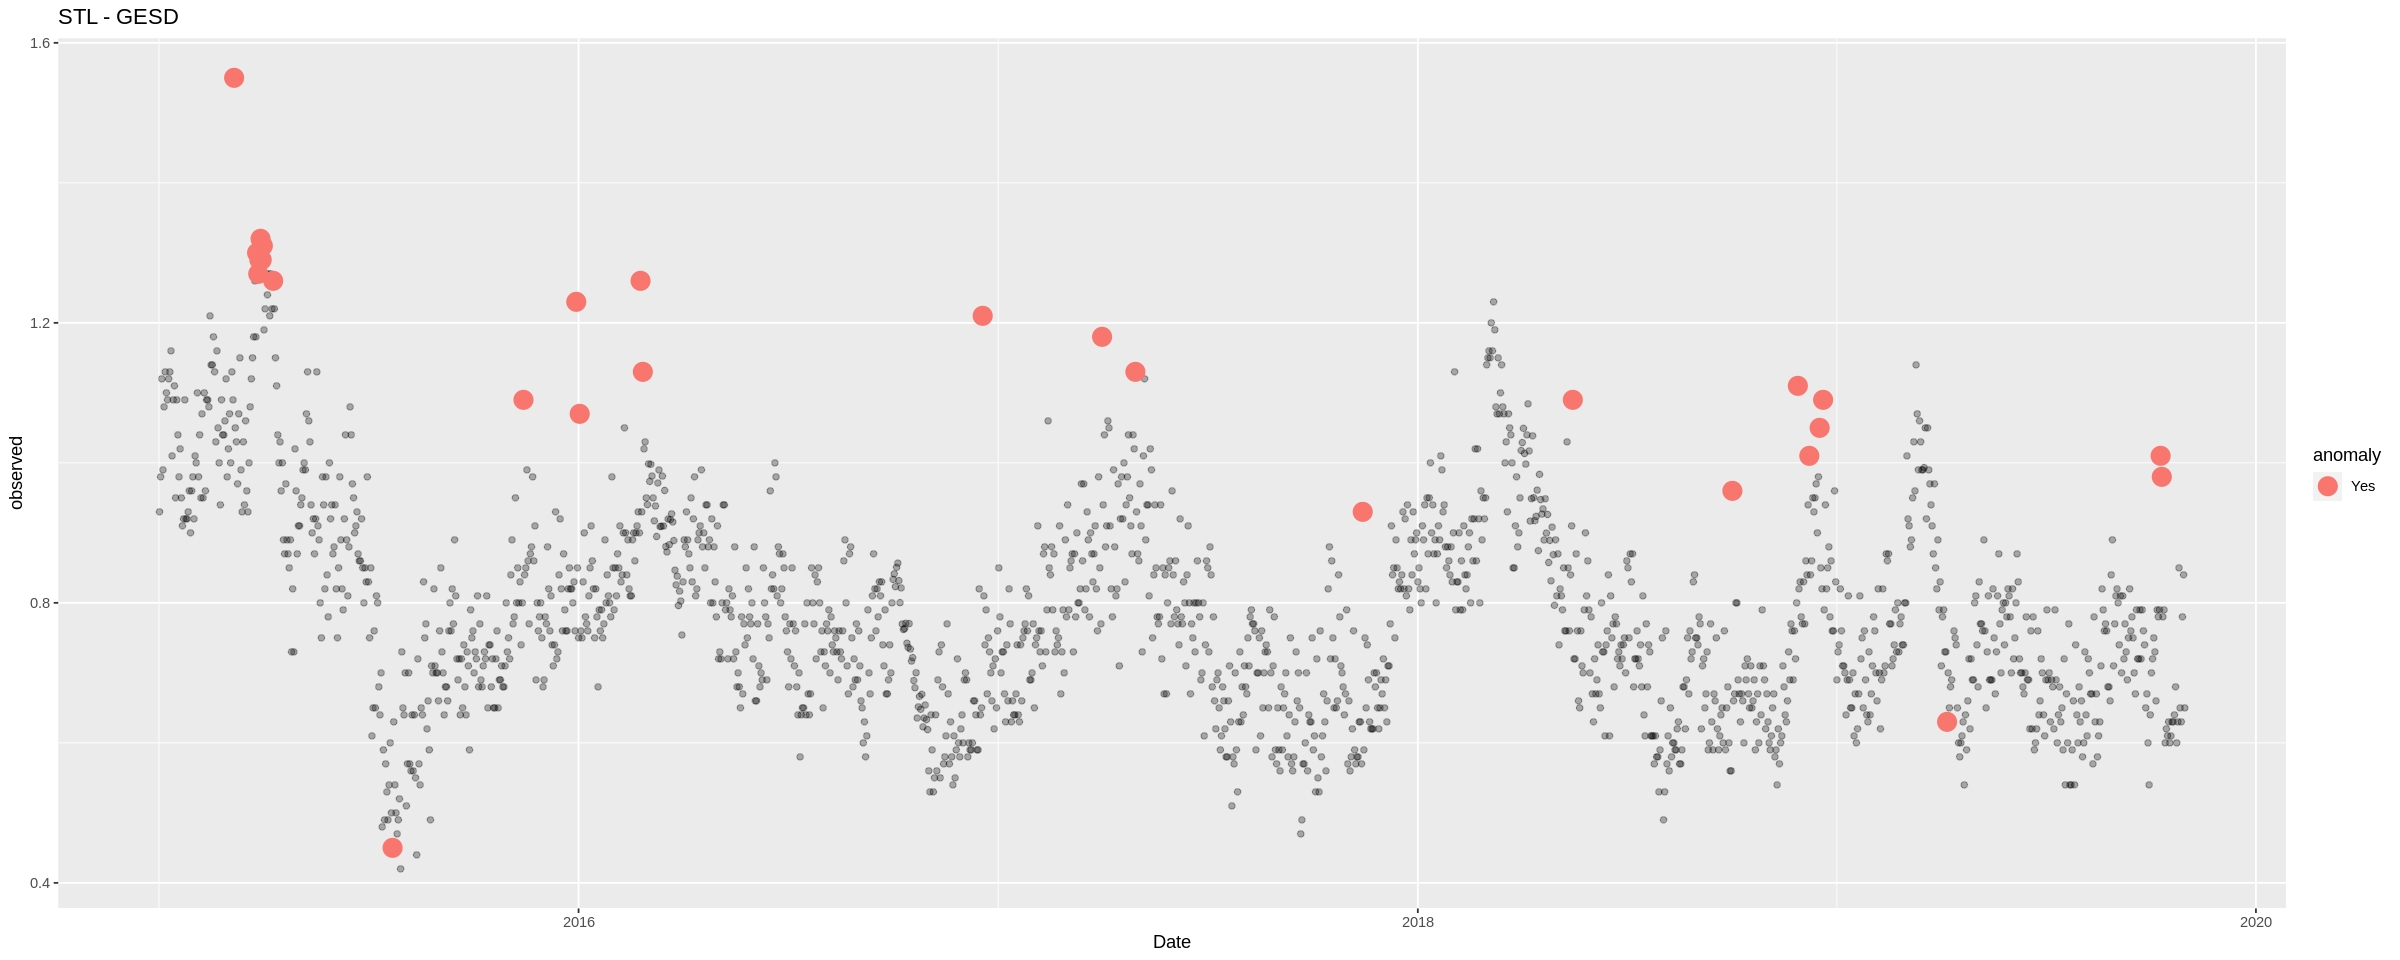

In [247]:
# plot outliers using ggplot
options(repr.plot.width=20, repr.plot.height=8)
anomaly_turbidity_points <- ano_turbidity[ano_turbidity$anomaly=="Yes",]
p1_stl <- ggplot(data=ano_turbidity, aes(x=Date, y=observed))+
    geom_point(alpha=0.3) +
    geom_point(data=anomaly_turbidity_points,
              aes(x=Date, y=observed, color=anomaly), size=5)+
    ggtitle("STL - GESD")
p1_stl
# Alternative
# ggplot(data=ano_turbidity, aes(x=Date, y=observed, color=anomaly)) + 
#     geom_point(aes(size=anomaly))

frequency = 365 days

median_span = 93 days



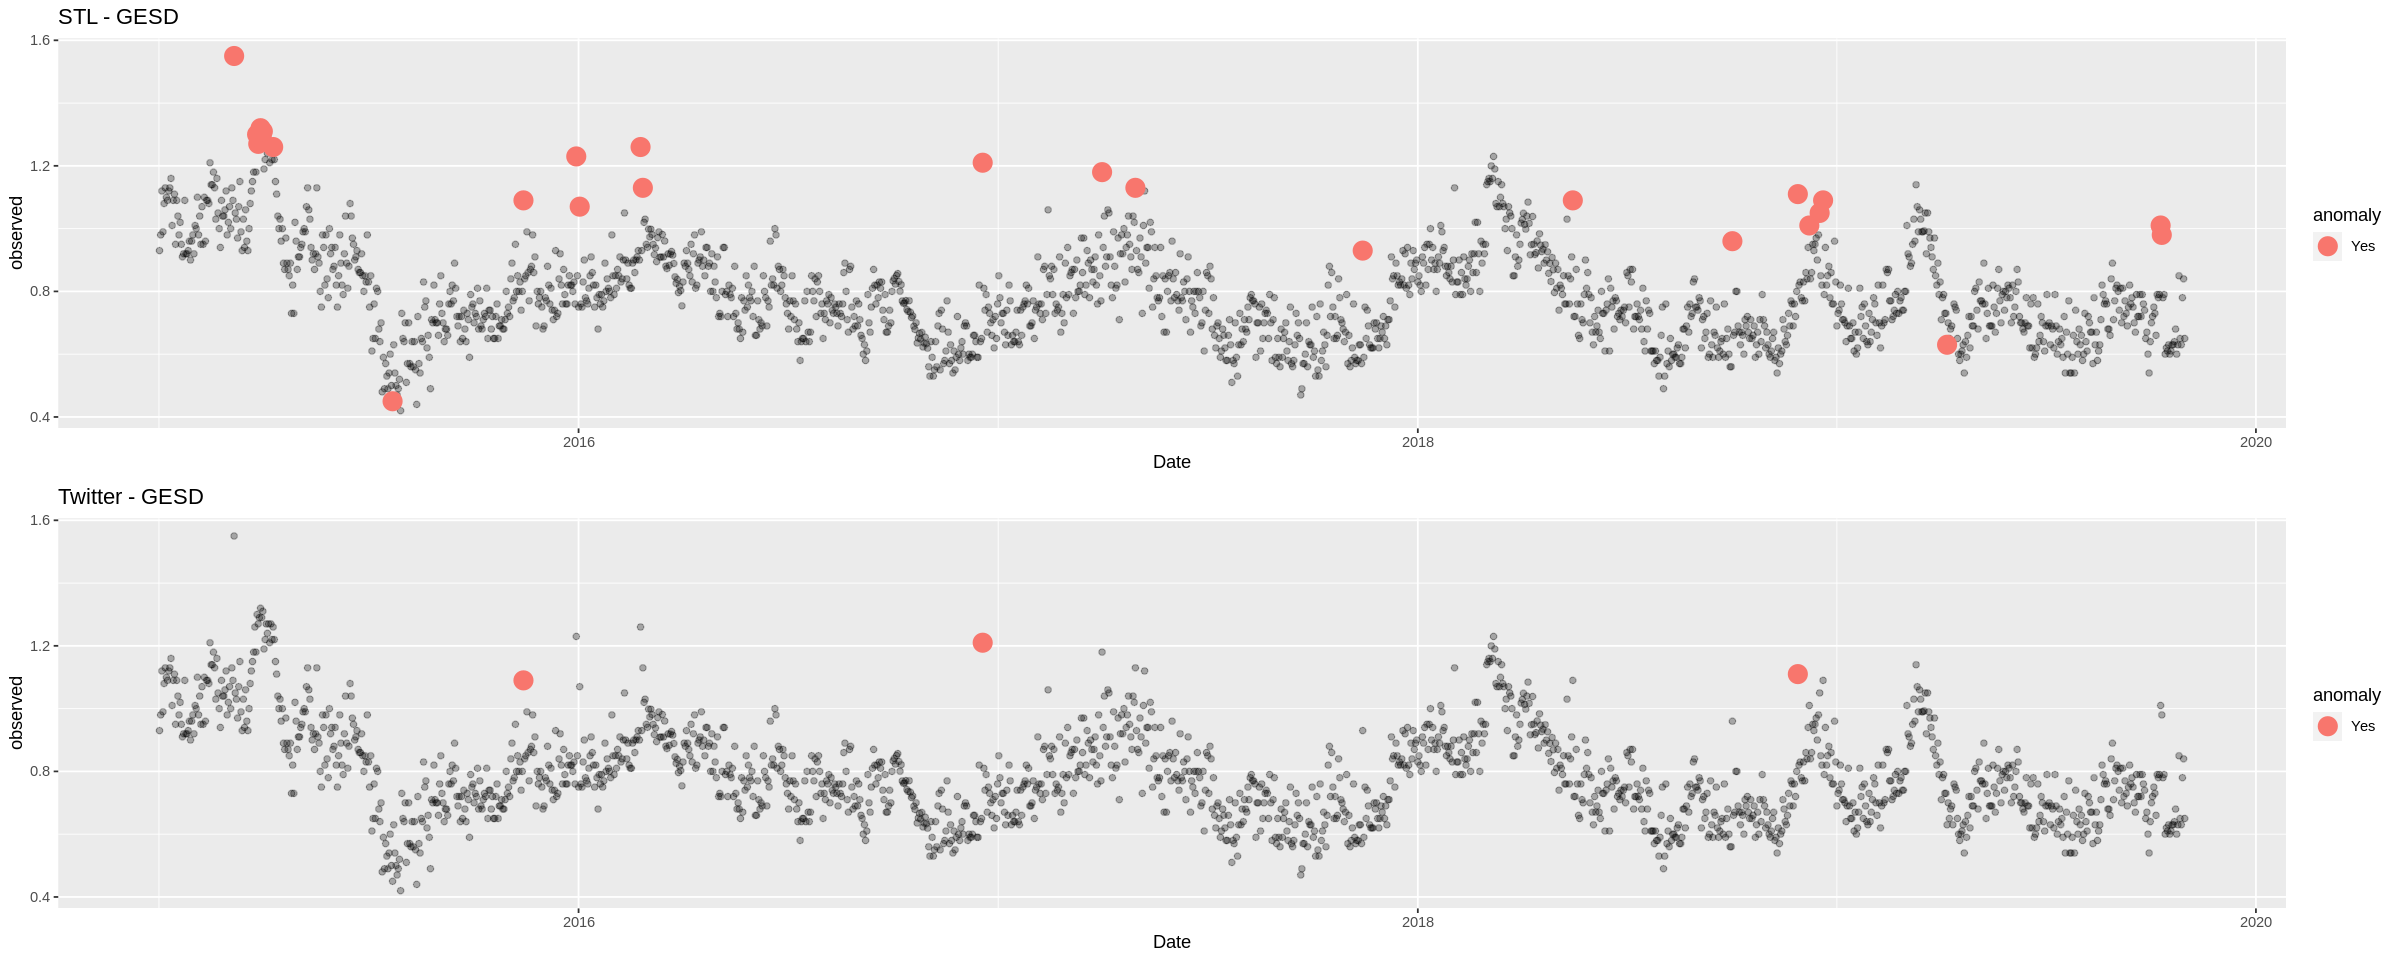

In [248]:
# find outlier using twitter and gesd
ano_turbidity_twitter_gesd <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="twitter",
                    frequency = "1 year") %>%
                anomalize(remainder, method="gesd") %>%
                time_recompose()

# plot
# options(repr.plot.width=20, repr.plot.height=8)
anomaly_turbidity_twitter <- ano_turbidity_twitter_gesd[ano_turbidity_twitter_gesd$anomaly=="Yes",]
p2_twitter <- ggplot(data=ano_turbidity_twitter_gesd, aes(x=Date, y=observed))+
    geom_point(alpha=0.3) +
    geom_point(data=anomaly_turbidity_twitter,
              aes(x=Date, y=observed, color=anomaly), size=5)+
    ggtitle("Twitter - GESD")
grid.arrange(p1_stl, p2_twitter, nrow=2)

In [249]:
# find outlier using iqr
ano_turb_iqr <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="stl",
                    frequency = "1 year") %>%
                anomalize(remainder, method=c("iqr")) %>%
                time_recompose()

frequency = 365 days

trend = 91 days



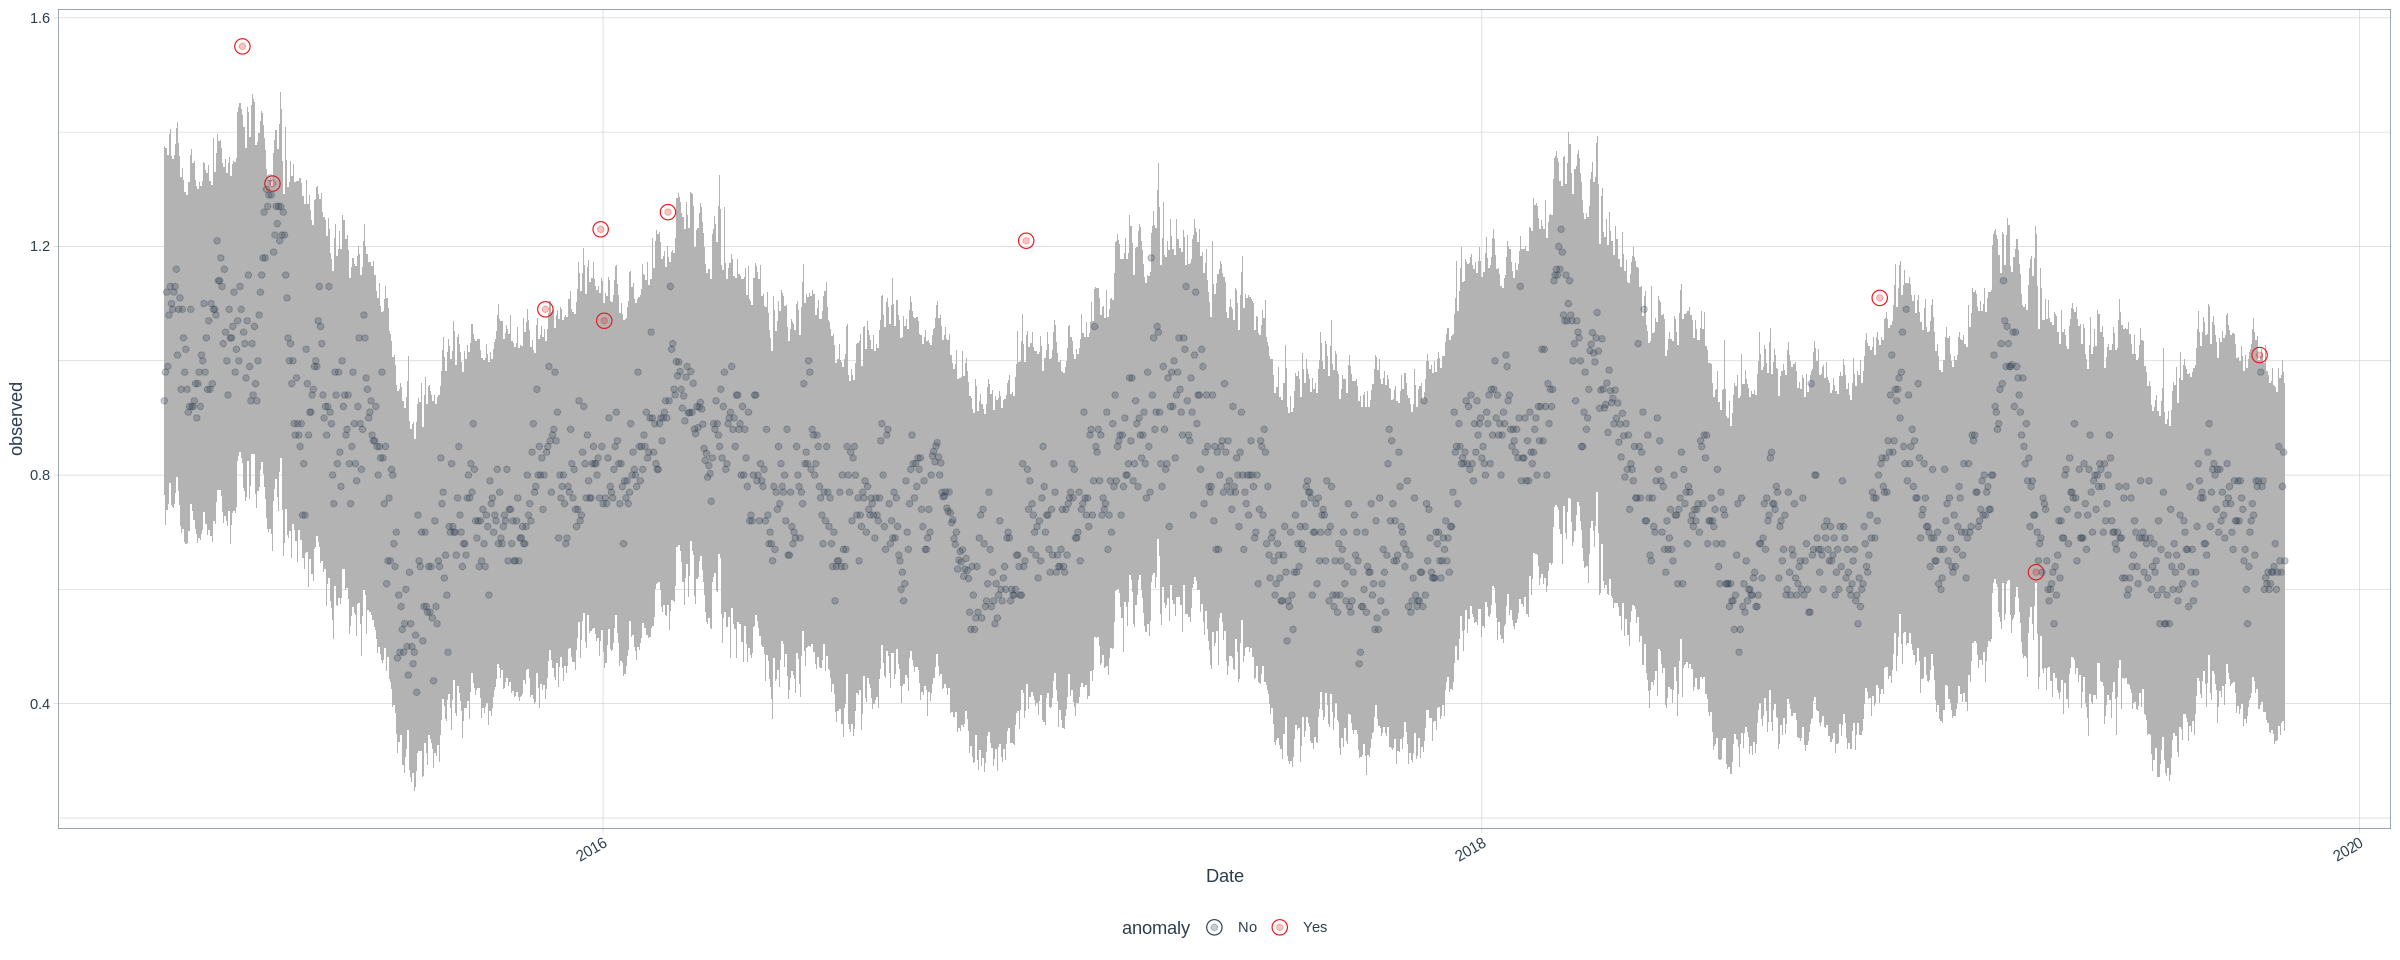

In [250]:
options(repr.plot.width=20, repr.plot.height=8)
ano_turb_iqr %>% plot_anomalies(time_recomposed = TRUE, ncol=4, alpha_dots = 0.25)

In [251]:
# plot iqr
iqr_turb_ano <- ano_turb_iqr[ano_turb_iqr$anomaly=="Yes",]
p3_stl_iqr <- ggplot(data=ano_turb_iqr, aes(x=Date, y=observed))+
    geom_point(alpha=0.3) +
    geom_point(data=iqr_turb_ano,
              aes(x=Date, y=observed, color=anomaly), size=5)+
    ggtitle("STL - IQR")

frequency = 365 days

median_span = 93 days



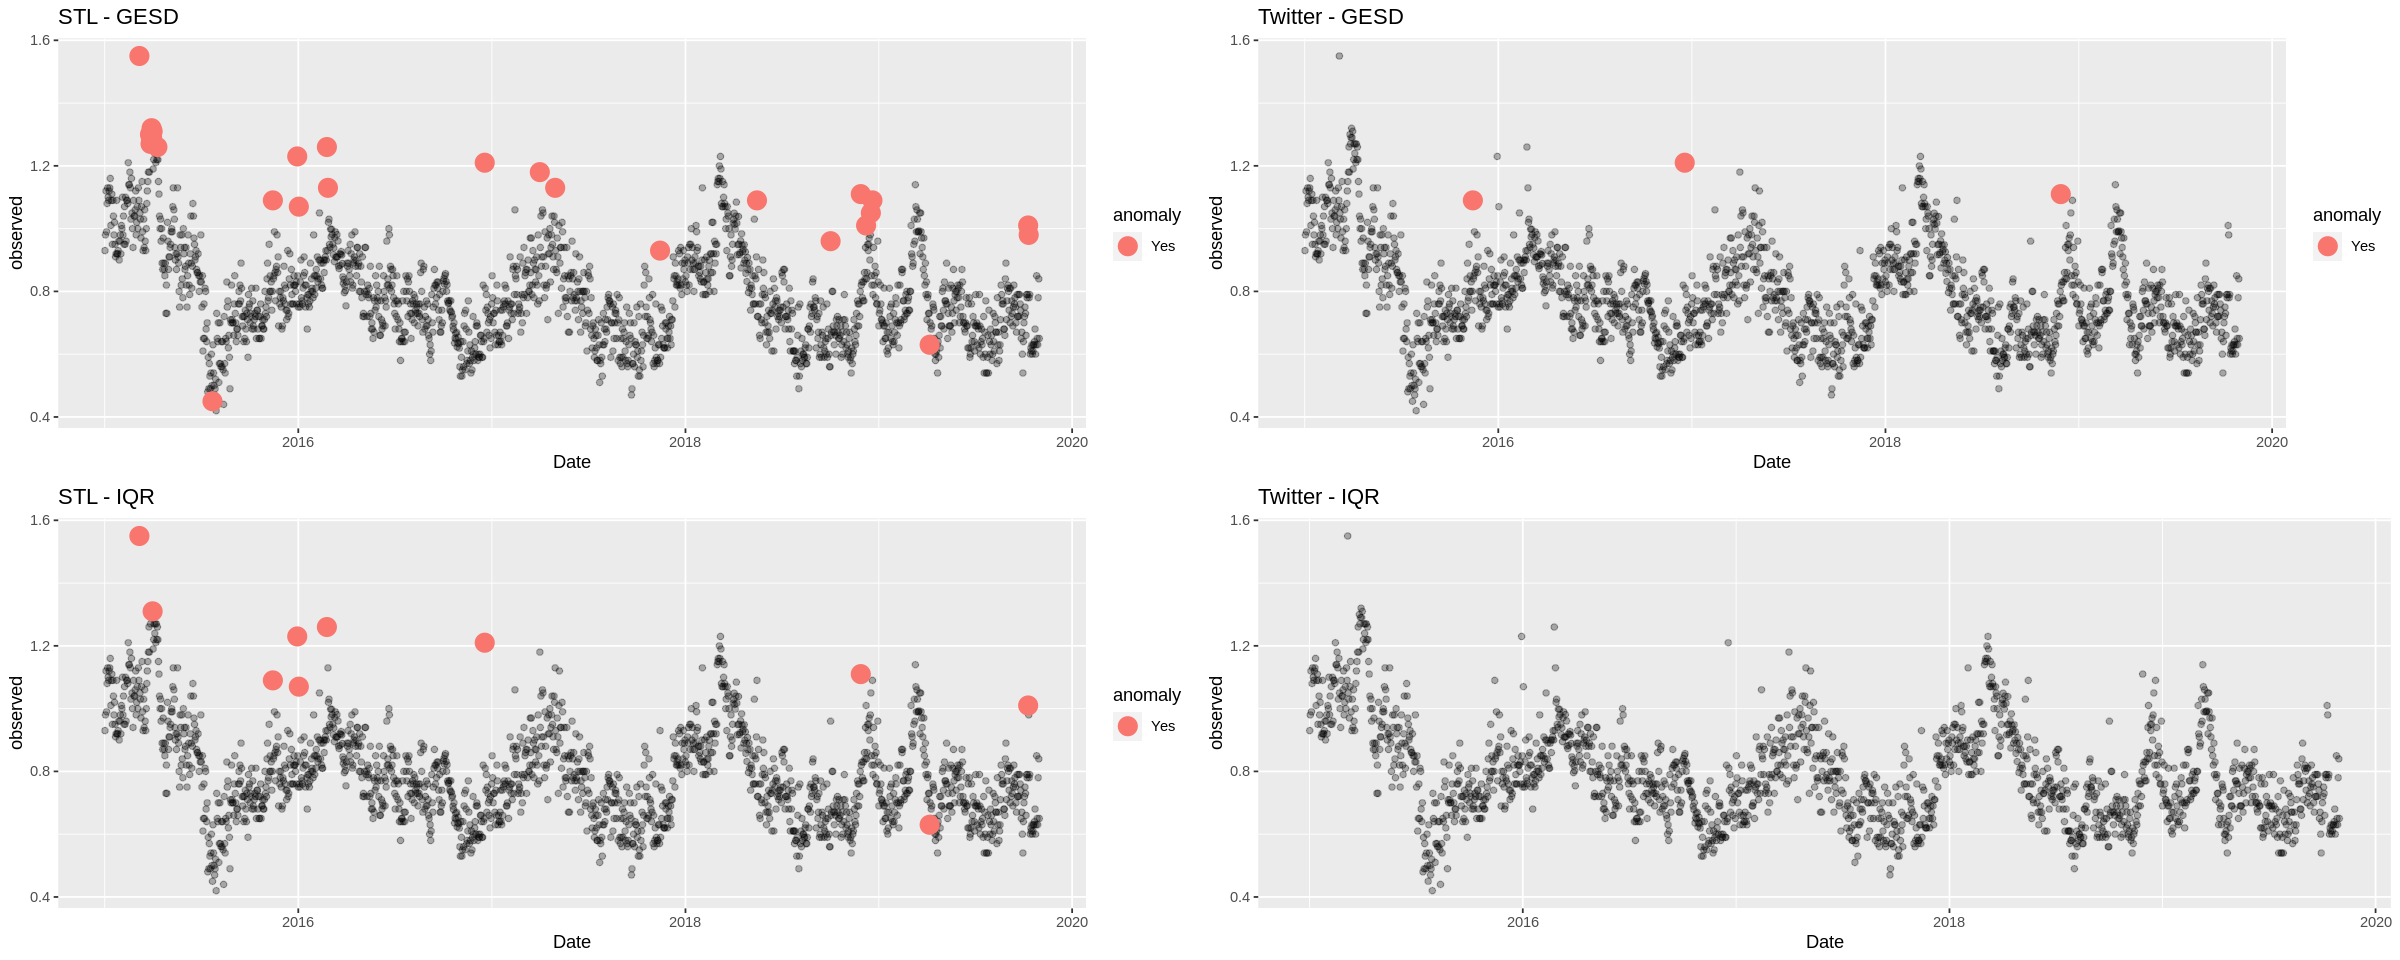

In [252]:
# twitter iqr
ano_turb_twitter_iqr <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="twitter",
                    frequency = "1 year") %>%
                anomalize(remainder, method=c("iqr")) %>%
                time_recompose()

# plot
iqr_turb_twitter <- ano_turb_twitter_iqr[ano_turb_twitter_iqr$anomaly=="Yes",]
p4_twitter_iqr <- ggplot(data=ano_turb_twitter_iqr, aes(x=Date, y=observed))+
    geom_point(alpha=0.3) +
    geom_point(data=iqr_turb_twitter,
              aes(x=Date, y=observed, color=anomaly), size=5)+
    ggtitle("Twitter - IQR")
# options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(p1_stl,p2_twitter, p3_stl_iqr, p4_twitter_iqr, ncol=2)

#### clean up the outliers

In [43]:
# the package has clean_anomalies which replaces the anomaly with seasonal and trend components
clean_turbidity <- time_decompose(data=data_subset_tibble,
                        target=Turbidity..NTU.,
                     method="stl",
                    frequency = "1 year") %>%
                anomalize(remainder, method="gesd") %>%
                clean_anomalies()
head(clean_turbidity)

frequency = 365 days

trend = 91 days



Date       observed season      trend    remainder    remainder_l1
1 2015-01-01 0.93      0.03197022 1.049002 -0.150972008 -0.2634141  
2 2015-01-02 0.98     -0.03316531 1.047084 -0.033919049 -0.2634141  
3 2015-01-03 1.12      0.02858183 1.045167  0.046251244 -0.2634141  
4 2015-01-04 0.99     -0.01773047 1.043249 -0.035519016 -0.2634141  
5 2015-01-05 1.08      0.03701685 1.041332  0.001651102 -0.2634141  
6 2015-01-06 1.13      0.06926179 1.039415  0.021323595 -0.2634141  
  remainder_l2 anomaly observed_cleaned
1 0.2617902    No      0.93            
2 0.2617902    No      0.98            
3 0.2617902    No      1.12            
4 0.2617902    No      0.99            
5 0.2617902    No      1.08            
6 0.2617902    No      1.13

In [46]:
BoxCox.lambda(turbidity)  # since it is close to 1, there's no need for transformation

[1] 1.015874

In [48]:
# extract the cleaned data and apply model to it
cleaned_turbidity_ts <- ts(clean_turbidity$observed_cleaned, start=c(2015,1), frequency = 365)

# apply auto.arima
cleaned_turbidity_arima <- auto.arima(cleaned_turbidity_ts)

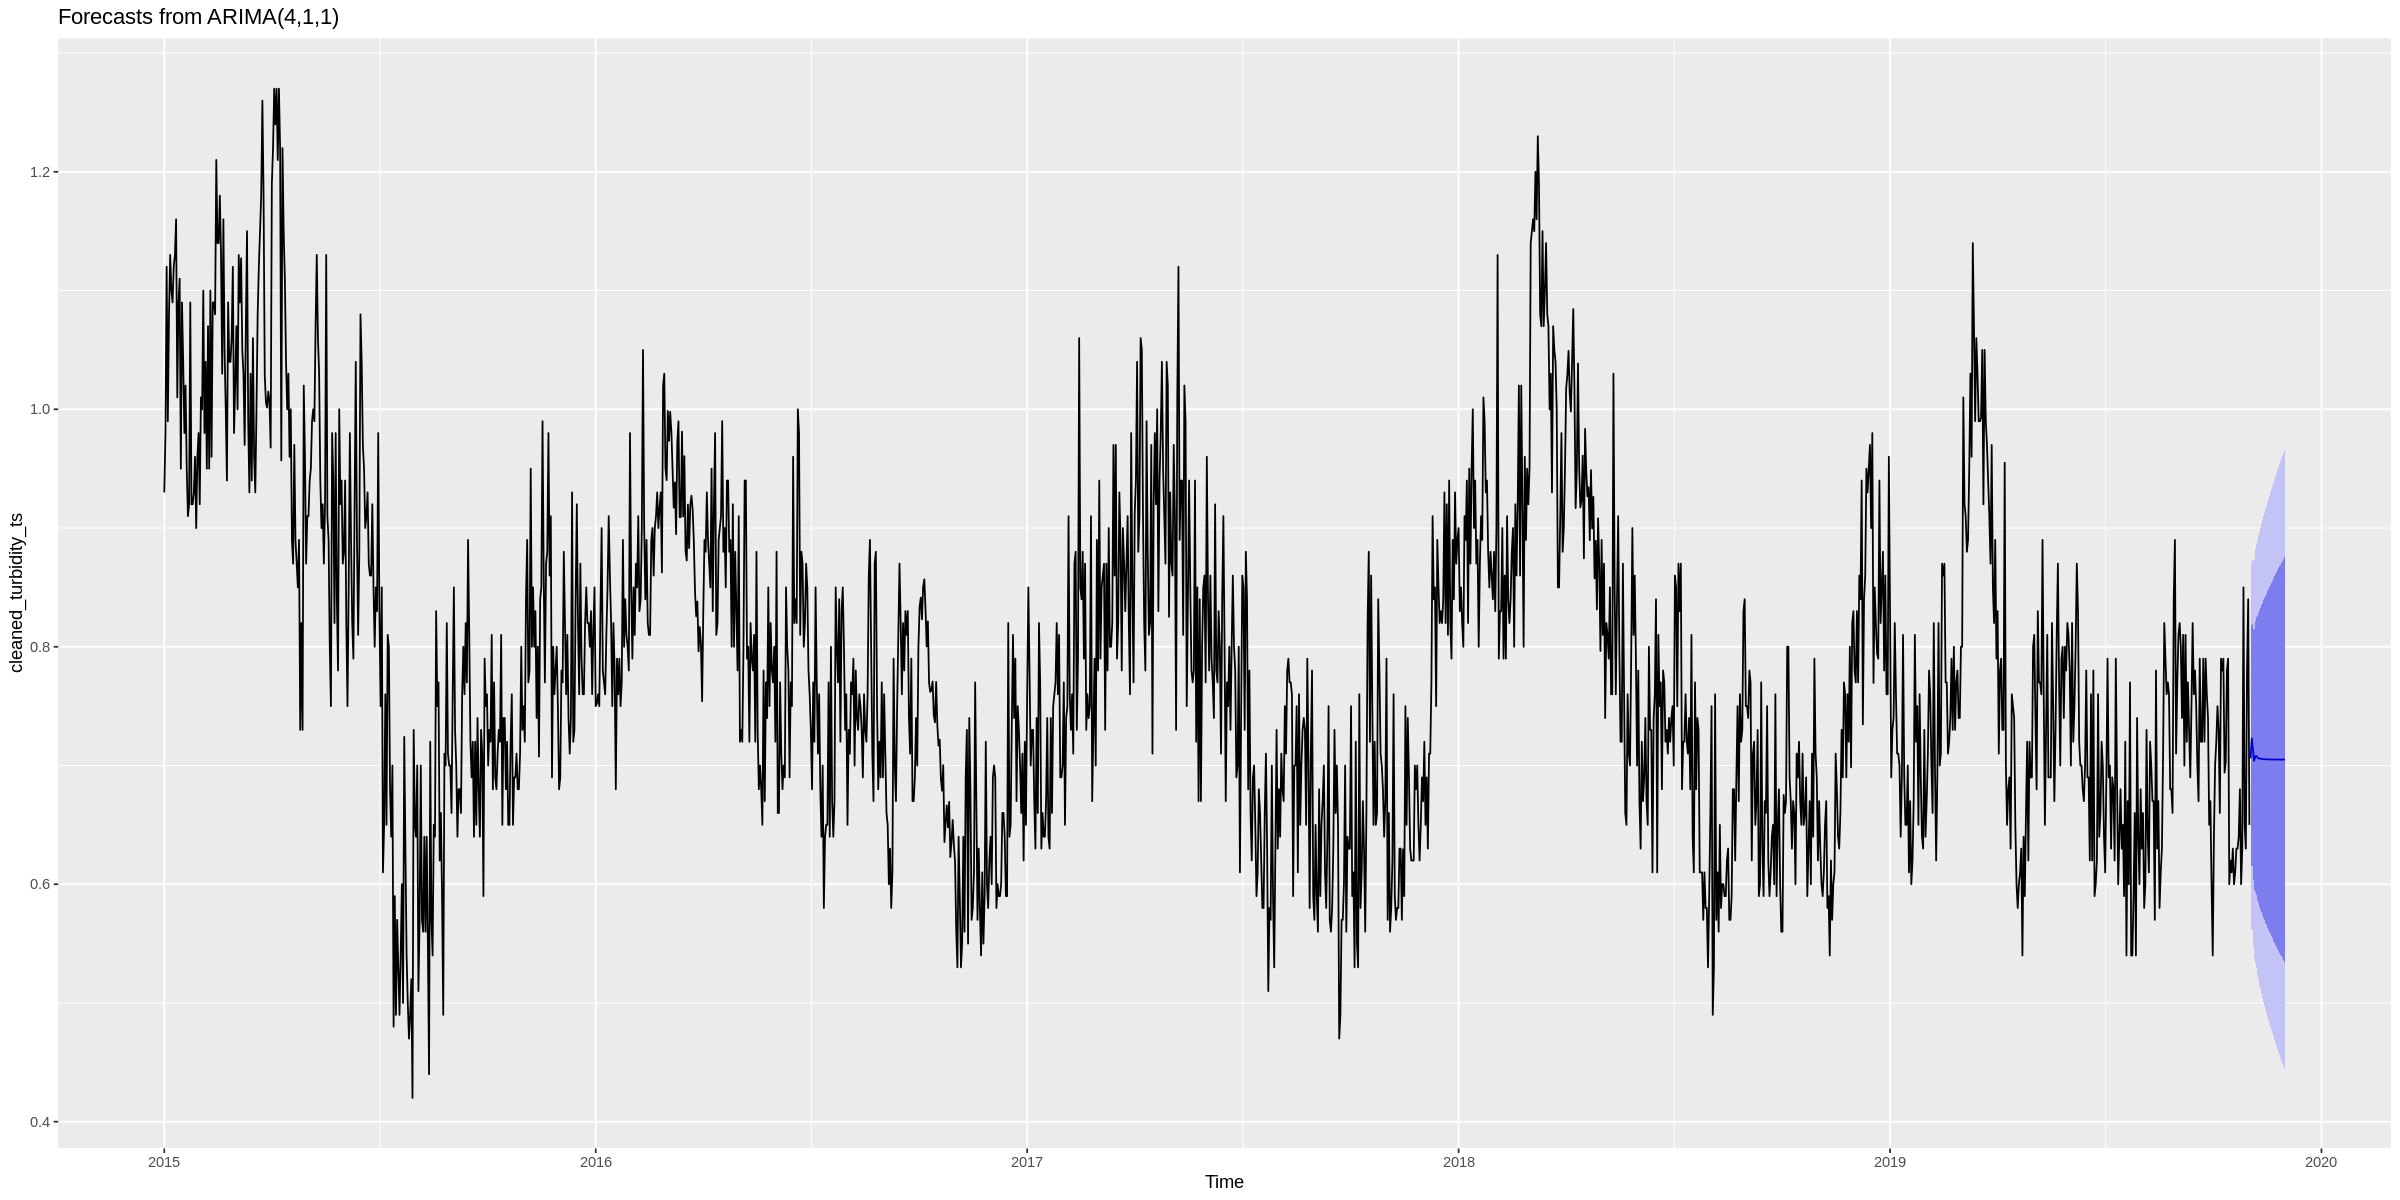

In [51]:
# forecast
cleaned_turbidity_fc <- forecast(cleaned_turbidity_arima, h=30)
autoplot(cleaned_turbidity_fc)

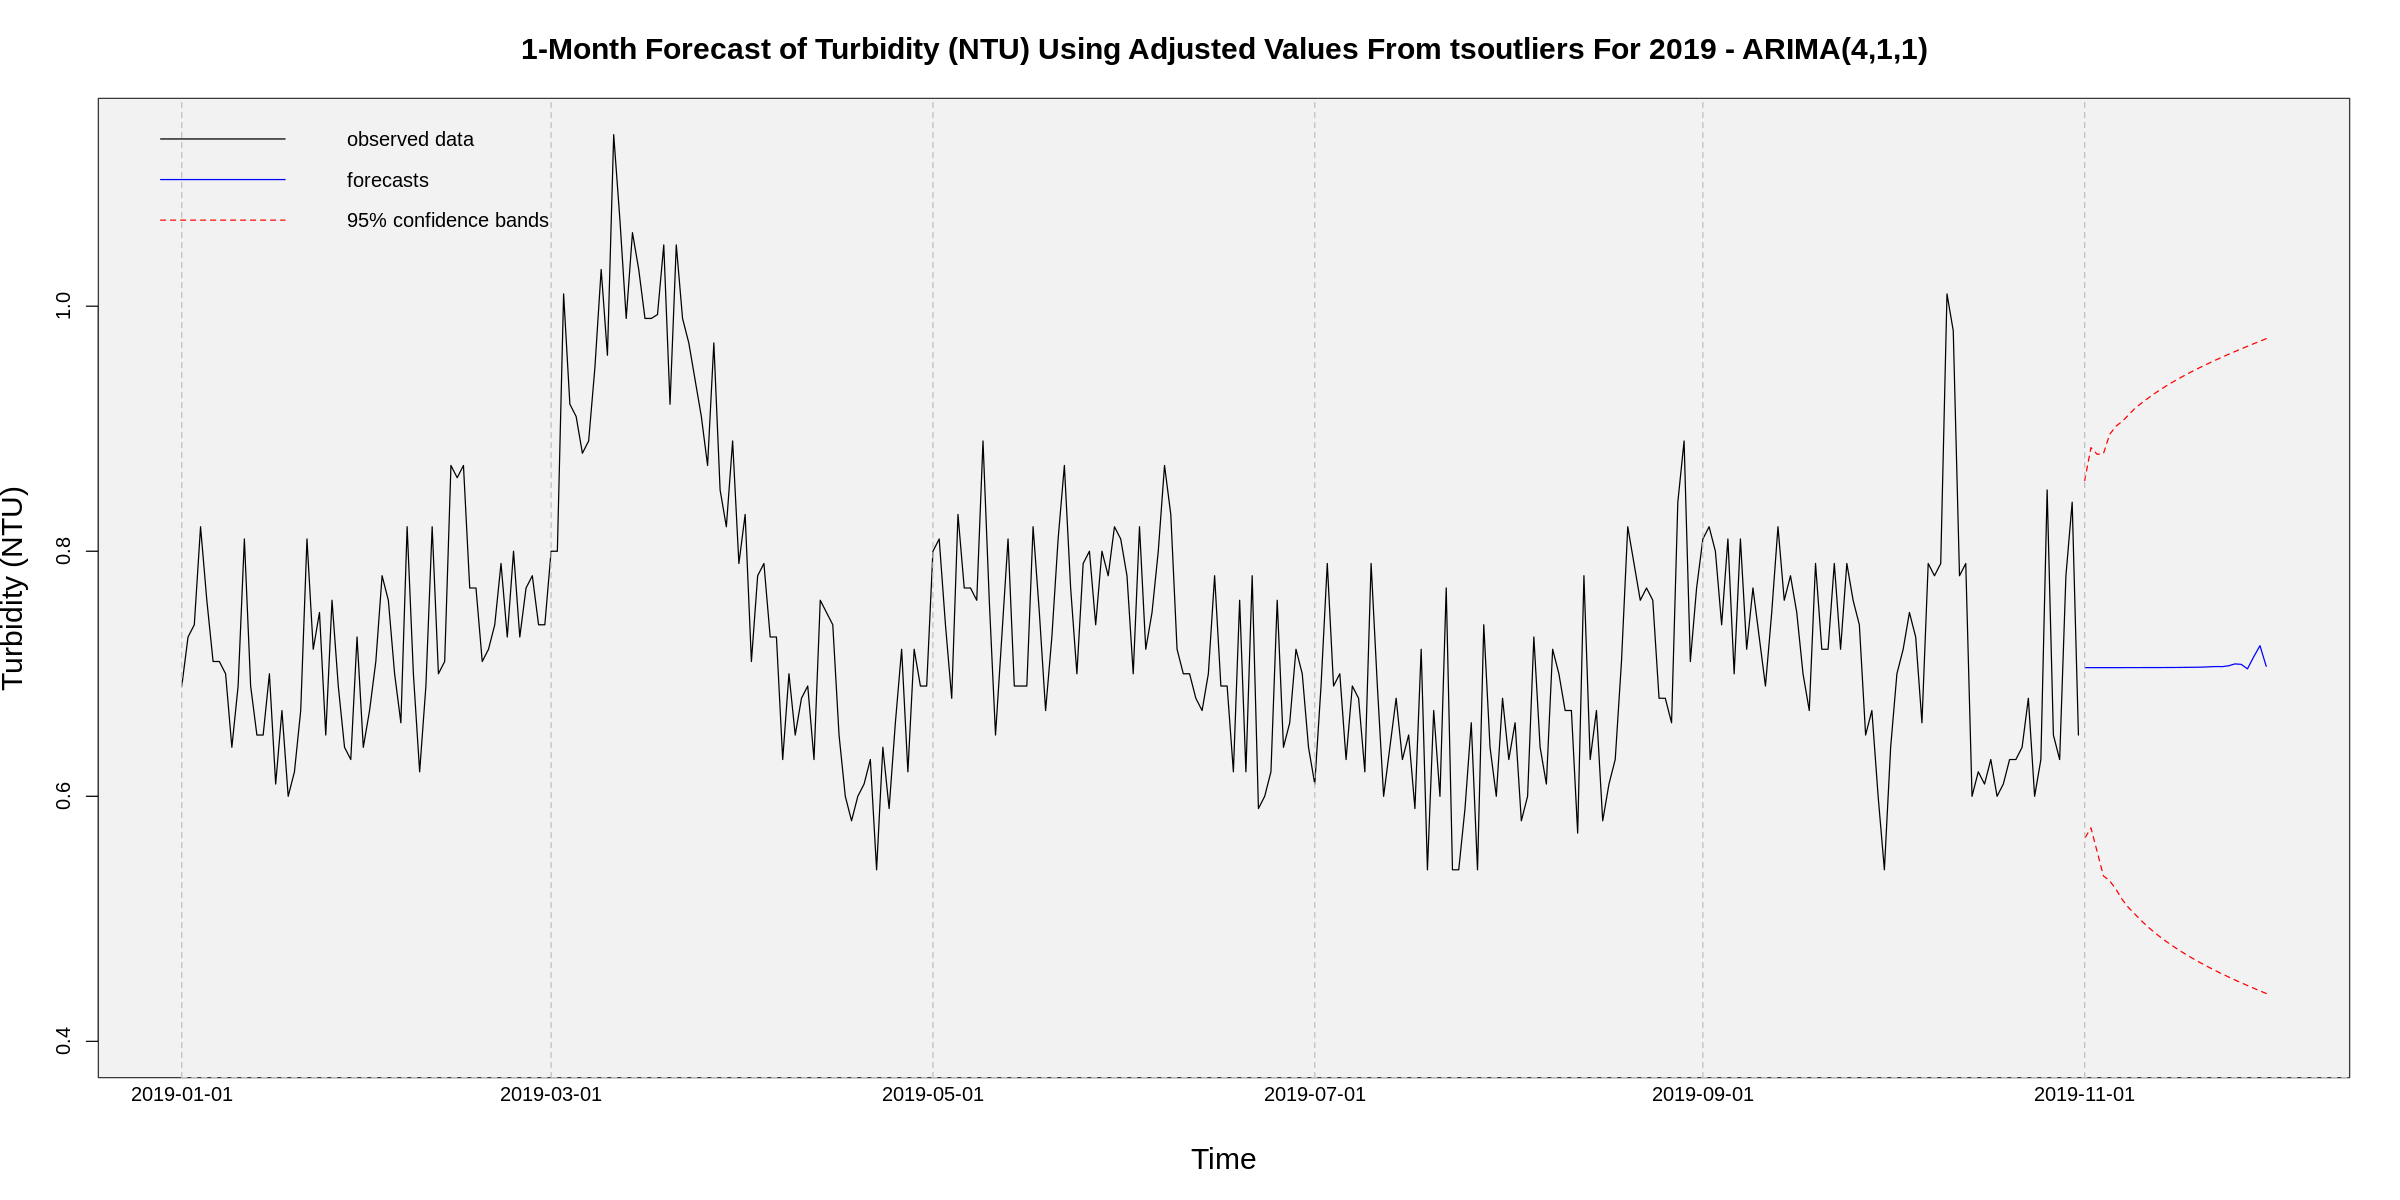

In [241]:
# plot the forecast
# forecast using adjusted y from tsoutliers 
options(repr.plot.width=20, repr.plot.height=10) 
# adj_fc <- forecast::forecast(adj_fit, h=30)  # get the forecast
adj_fc_ts <- ts(cleaned_turbidity_fc$mean, start=c(2019,11))  # create the point forecast as ts
origin <- tail(turbidity, 304)  # from 2019-01-01 onwards, 304 are the days between 2019-01-01 to 2019-10-31 
x <- ts(c(origin, adj_fc_ts), start=c(2019,1), frequency = frequency(origin))  # combine the object and sliced data as ts
time <- seq(as.Date("2019-01-01"), as.Date("2019-11-30"), by=1)  # calculate the dates for the origin and forecast
time_fc <- time[seq(length=length(adj_fc_ts), from=length(x), by=-1)]  # get the time frame for the forecast
upper <- ts(rev(adj_fc$upper[,"95%"]), start=c(2019,11))  # get the upper boundary
lower <- ts(rev(adj_fc$lower[,"95%"]), start=c(2019,11))  # get the lower 95% boundary

# plot
plot(time, x, type="n", xaxt="n", ylim=c(0.4, max(x)), ylab="", xlab="")
rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = "grey95")
lines(head(time, 304),origin)
lines(time_fc, adj_fc_ts, type="l", col="blue")
lines(time_fc, upper, type = "l", col = "red", lty = 2)
lines(time_fc, lower, type = "l", col = "red", lty = 2)

# add in xticks
xtick <- seq(as.Date("2019-01-01"), by = "2 month", length=10+2) 
axis(side = 1, at = xtick, labels = FALSE, tck = 1, lty = 2, col = "grey")
text(x=xtick,  par("usr")[3], 
     labels = xtick, srt = 0, pos = 1, xpd = TRUE)

# legend
legend("topleft", legend = c("observed data", 
  "forecasts", "95% confidence bands"), lty = c(1,1,2,2), 
  col = c("black", "blue", "red", "red"), bty = "n")

# title
title(main="1-Month Forecast of Turbidity (NTU) Using Adjusted Values From tsoutliers For 2019 - ARIMA(4,1,1)",
     ylab="Turbidity (NTU)", xlab="Time", cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
# plot(forecast(fit, h=200), include = X)  # this will plot the X amount form original series but the xticks will be incomprehensible

`anomalize` package fundamentally decompose a time series into seasonal, trend and remainder (residuals). The decomposition method it uses are: seasonal decomposition of time series by Loess (STL) and seasonal decomposition by piecewise medians (Twitter). Then, it detects the anomalies using either inter-quantile range (IQR) or eneralized extreme studentized deviation (GESD). 

According to the author:
"STL works very well in circumstances where a long term trend is present. The Loess algorithm typically does a very good job at detecting the trend. However, it circumstances when the seasonal component is more dominant than the trend, Twitter tends to perform better.

The Twitter method works identically to STL for removing the seasonal component. The main difference is in removing the trend, which is performed by removing the median of the data rather than fitting a smoother. The median works well when a long-term trend is less dominant that the short-term seasonal component. This is because the smoother tends to overfit the anomalies."

IQR method basically uses the Q1 and Q3 to calculate IQR. By default, the package sets the limit to be 3xIQR above and below the media. However, it may not be as accurate in detecting anomalies since the high leverage anomalies can skew the centerline (median) of the IQR. GESD progressively eliminates out-liers using a Student’s T-Test comparing the test statistic to a critical value. For information on [GESD](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm).

From the results above, it can be seen that STL + GESD gives the highest number of anomalies while Twitter + IQR method gave the least. If cleaning of the anomalies is desired, the package also has a function to do that. The `anomalize` package also has the function to cleaned up outliers by replacing them with seasonal and trend components. 

### Using tsoutliers

According to `tsoutliers`, the different types of outliers include:

- Additive outliers: represents an isolated spike
- Level shifts: abrupt change in mean and could be seasonal (aka Seasonal level shifts)
- Transient change: a spike that takes a while to disappear
- Innovation outliers: a shock in the innovation of the model 

For more resources on tsoutliers:

- https://stats.stackexchange.com/questions/168655/how-to-interpret-and-do-forecasting-using-tsoutliers-package-and-auto-arima
- https://stats.stackexchange.com/questions/104882/detecting-outliers-in-time-series-ls-ao-tc-using-tsoutliers-package-in-r-how
- https://stats.stackexchange.com/questions/169468/how-to-do-forecasting-with-detection-of-outliers-in-r-time-series-analysis-pr?rq=1
- https://stackoverflow.com/questions/31368363/outier-detection-using-tsoutlier-in-r
- https://stats.stackexchange.com/questions/69874/how-to-correct-outliers-once-detected-for-time-series-data-forecasting

From the author's notes, this the simple explanation of the process:
- 1) Detection of outliers upon a chosen ARIMA model. Given  an  ARIMA  model  fitted  to  the  data,  outliers  are  detected  andlocated by checking the significance of all types of outliers at all possible time points.
- 2) Choose and/or refit the ARIMA model including the outliers detected in the previous step and remove those outliers that are not significant in the new fit.

The series is then adjusted for the detected outliers and the stages (1) and (2) are repeated until no more outliers are detected or until a maximum number of iterations is reached.

#### tsoutliers with tuning

In [267]:
# identify outliers with tuning
outliers_auto_turbidity <- tsoutliers::tso(turbidity, types = c("TC", "AO", "LS", "IO", "SLS"), tsmethod = "auto.arima", args.tsmethod = list(allowdrift=TRUE, stepwise=FALSE, approximation=FALSE))
# take forever

In [269]:
outliers_auto_turbidity  # suggested Arima(4,1,1)

Series: turbidity 
Regression with ARIMA(4,1,1) errors 

Coefficients:
         ar1     ar2     ar3     ar4      ma1    AO66   IO364   IO718  AO1049
      0.3118  0.1649  0.1892  0.1118  -0.9521  0.5010  0.4223  0.4908  0.2982
s.e.  0.0378  0.0323  0.0299  0.0278   0.0280  0.0673  0.0734  0.0730  0.0673
      AO1129  AO1232  IO1371  IO1428
      0.2780  0.2823  0.3425  0.3471
s.e.  0.0672  0.0672  0.0728  0.0726

sigma^2 estimated as 0.005576:  log likelihood=2080.19
AIC=-4132.39   AICc=-4132.15   BIC=-4055.73

Outliers:
  type  ind     time coefhat tstat
1   AO   66  2015:66  0.5010 7.446
2   IO  364 2015:364  0.4223 5.753
3   IO  718 2016:353  0.4908 6.720
4   AO 1049 2017:319  0.2982 4.431
5   AO 1129  2018:34  0.2780 4.140
6   AO 1232 2018:137  0.2823 4.202
7   IO 1371 2018:276  0.3425 4.703
8   IO 1428 2018:333  0.3471 4.785

numeric(0)

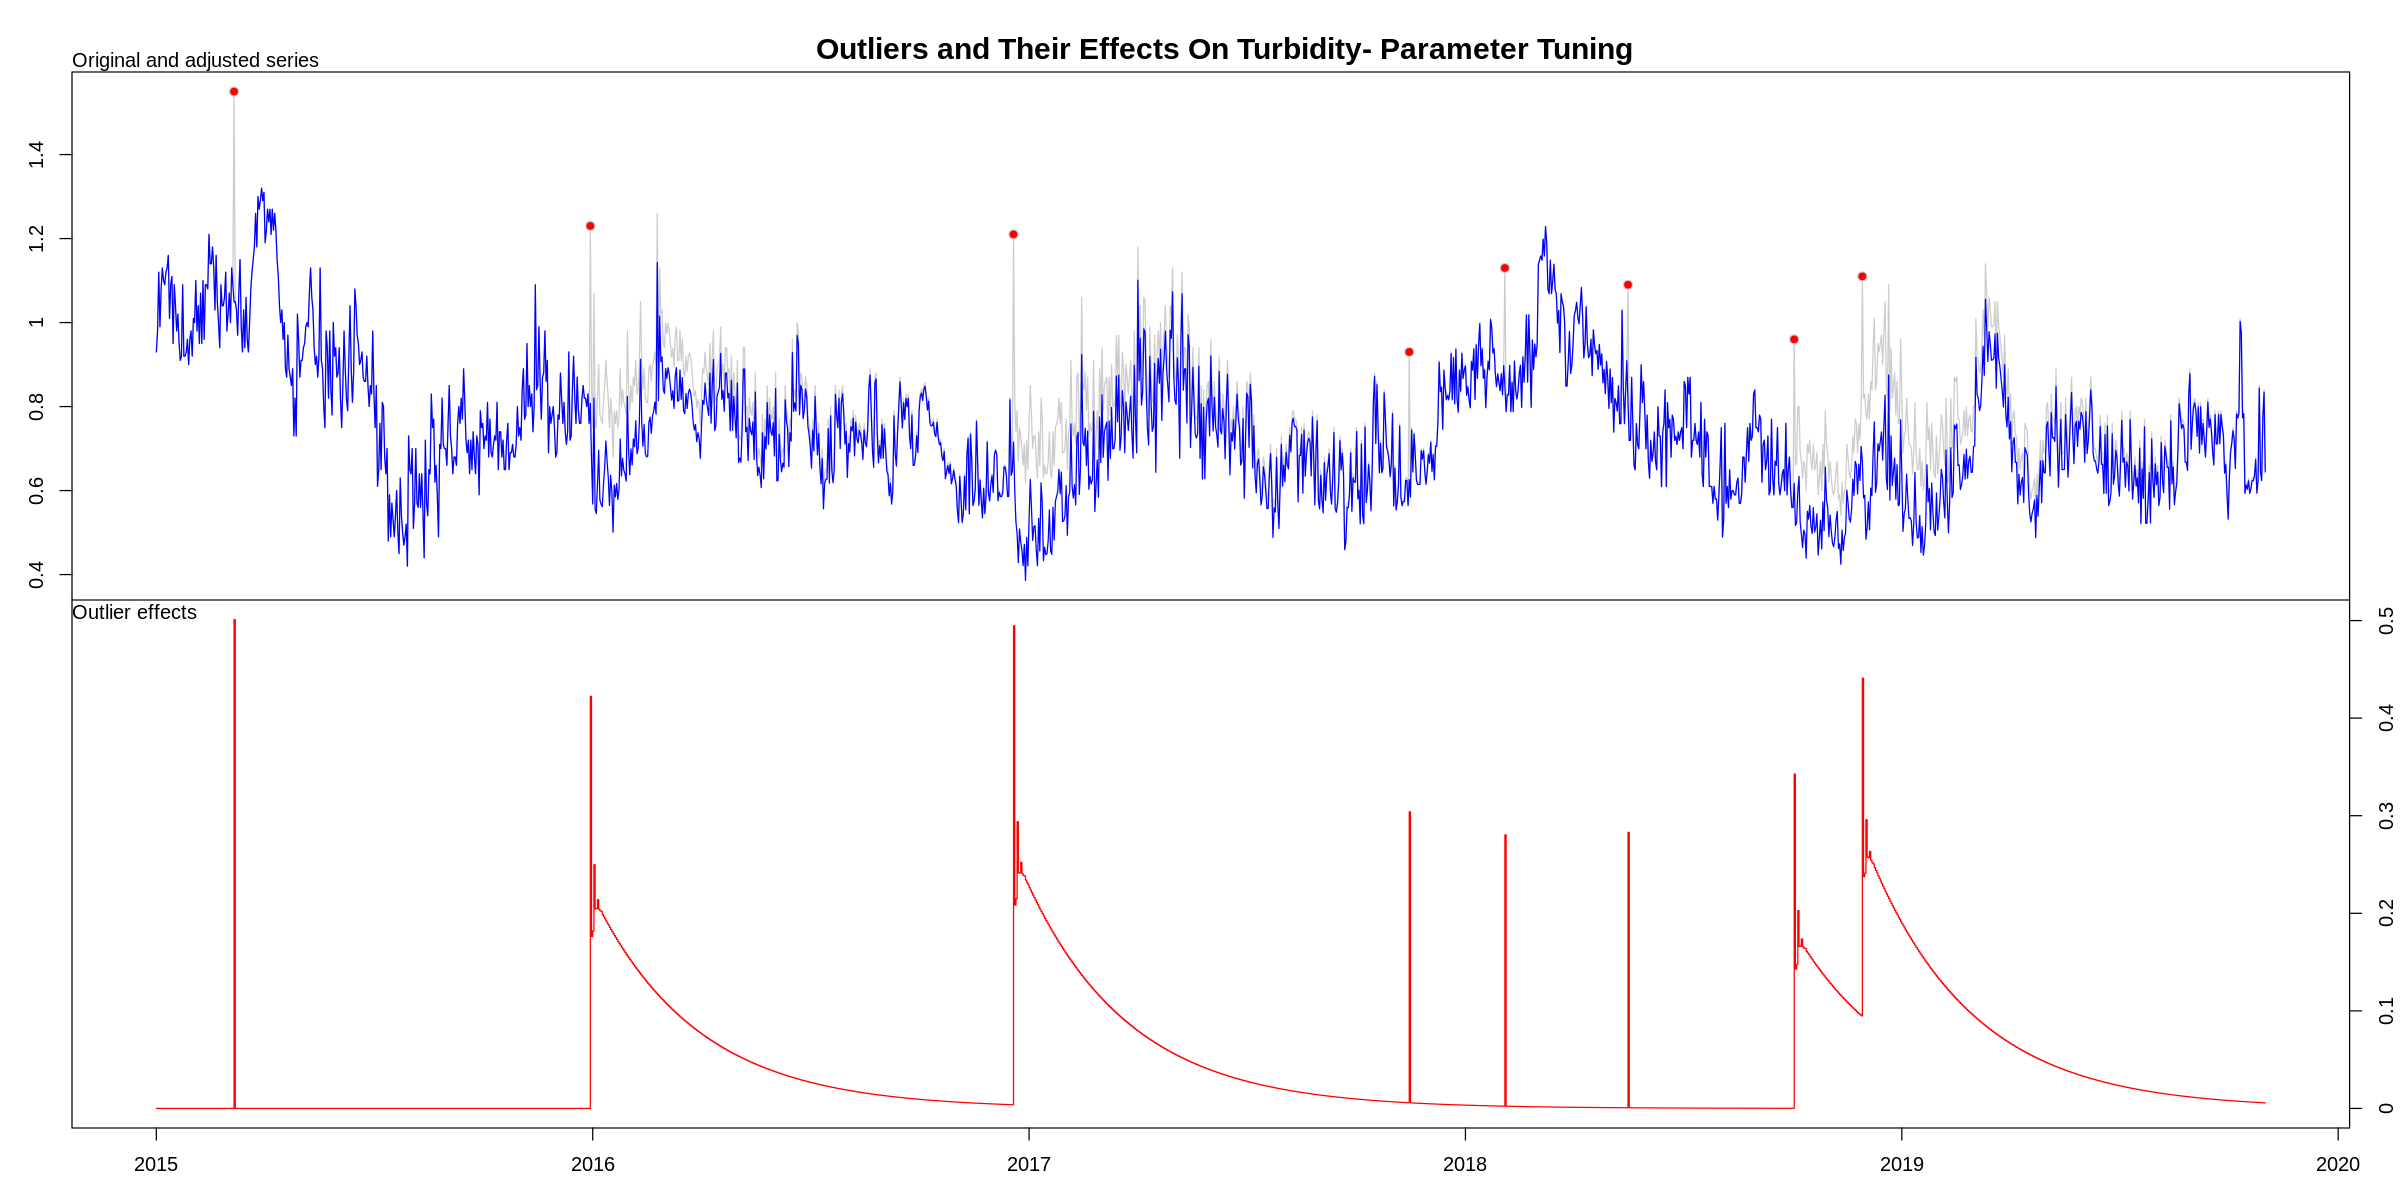

In [234]:
# show the outlier
ts_out_tuning <- plot(outliers_auto_turbidity) + # the blue lines are the series cleaned from the effect of outliers.
title("Outliers and Their Effects On Turbidity- Parameter Tuning", cex.main=1.5)
ts_out_tuning

#### tsoutliers with no tuning

In [264]:
# to identify the outliers in the turbidity without tuning
outliers_turbidity_tso <- tsoutliers::tso(turbidity, types = c("TC", "AO", "LS", "IO", "SLS"), tsmethod = "auto.arima")

In [257]:
outliers_turbidity_tso  # tsoutliers found the following outliers: AO are additive outliers

Series: turbidity 
Regression with ARIMA(0,1,1) errors 

Coefficients:
          ma1    AO66   AO364  AO1129  AO1232
      -0.6700  0.4971  0.4096  0.2823  0.2900
s.e.   0.0178  0.0702  0.0702  0.0702  0.0702

sigma^2 estimated as 0.005923:  log likelihood=2022.85
AIC=-4033.7   AICc=-4033.65   BIC=-4000.85

Outliers:
  type  ind     time coefhat tstat
1   AO   66  2015:66  0.4971 7.077
2   AO  364 2015:364  0.4096 5.832
3   AO 1129  2018:34  0.2823 4.020
4   AO 1232 2018:137  0.2900 4.130

numeric(0)

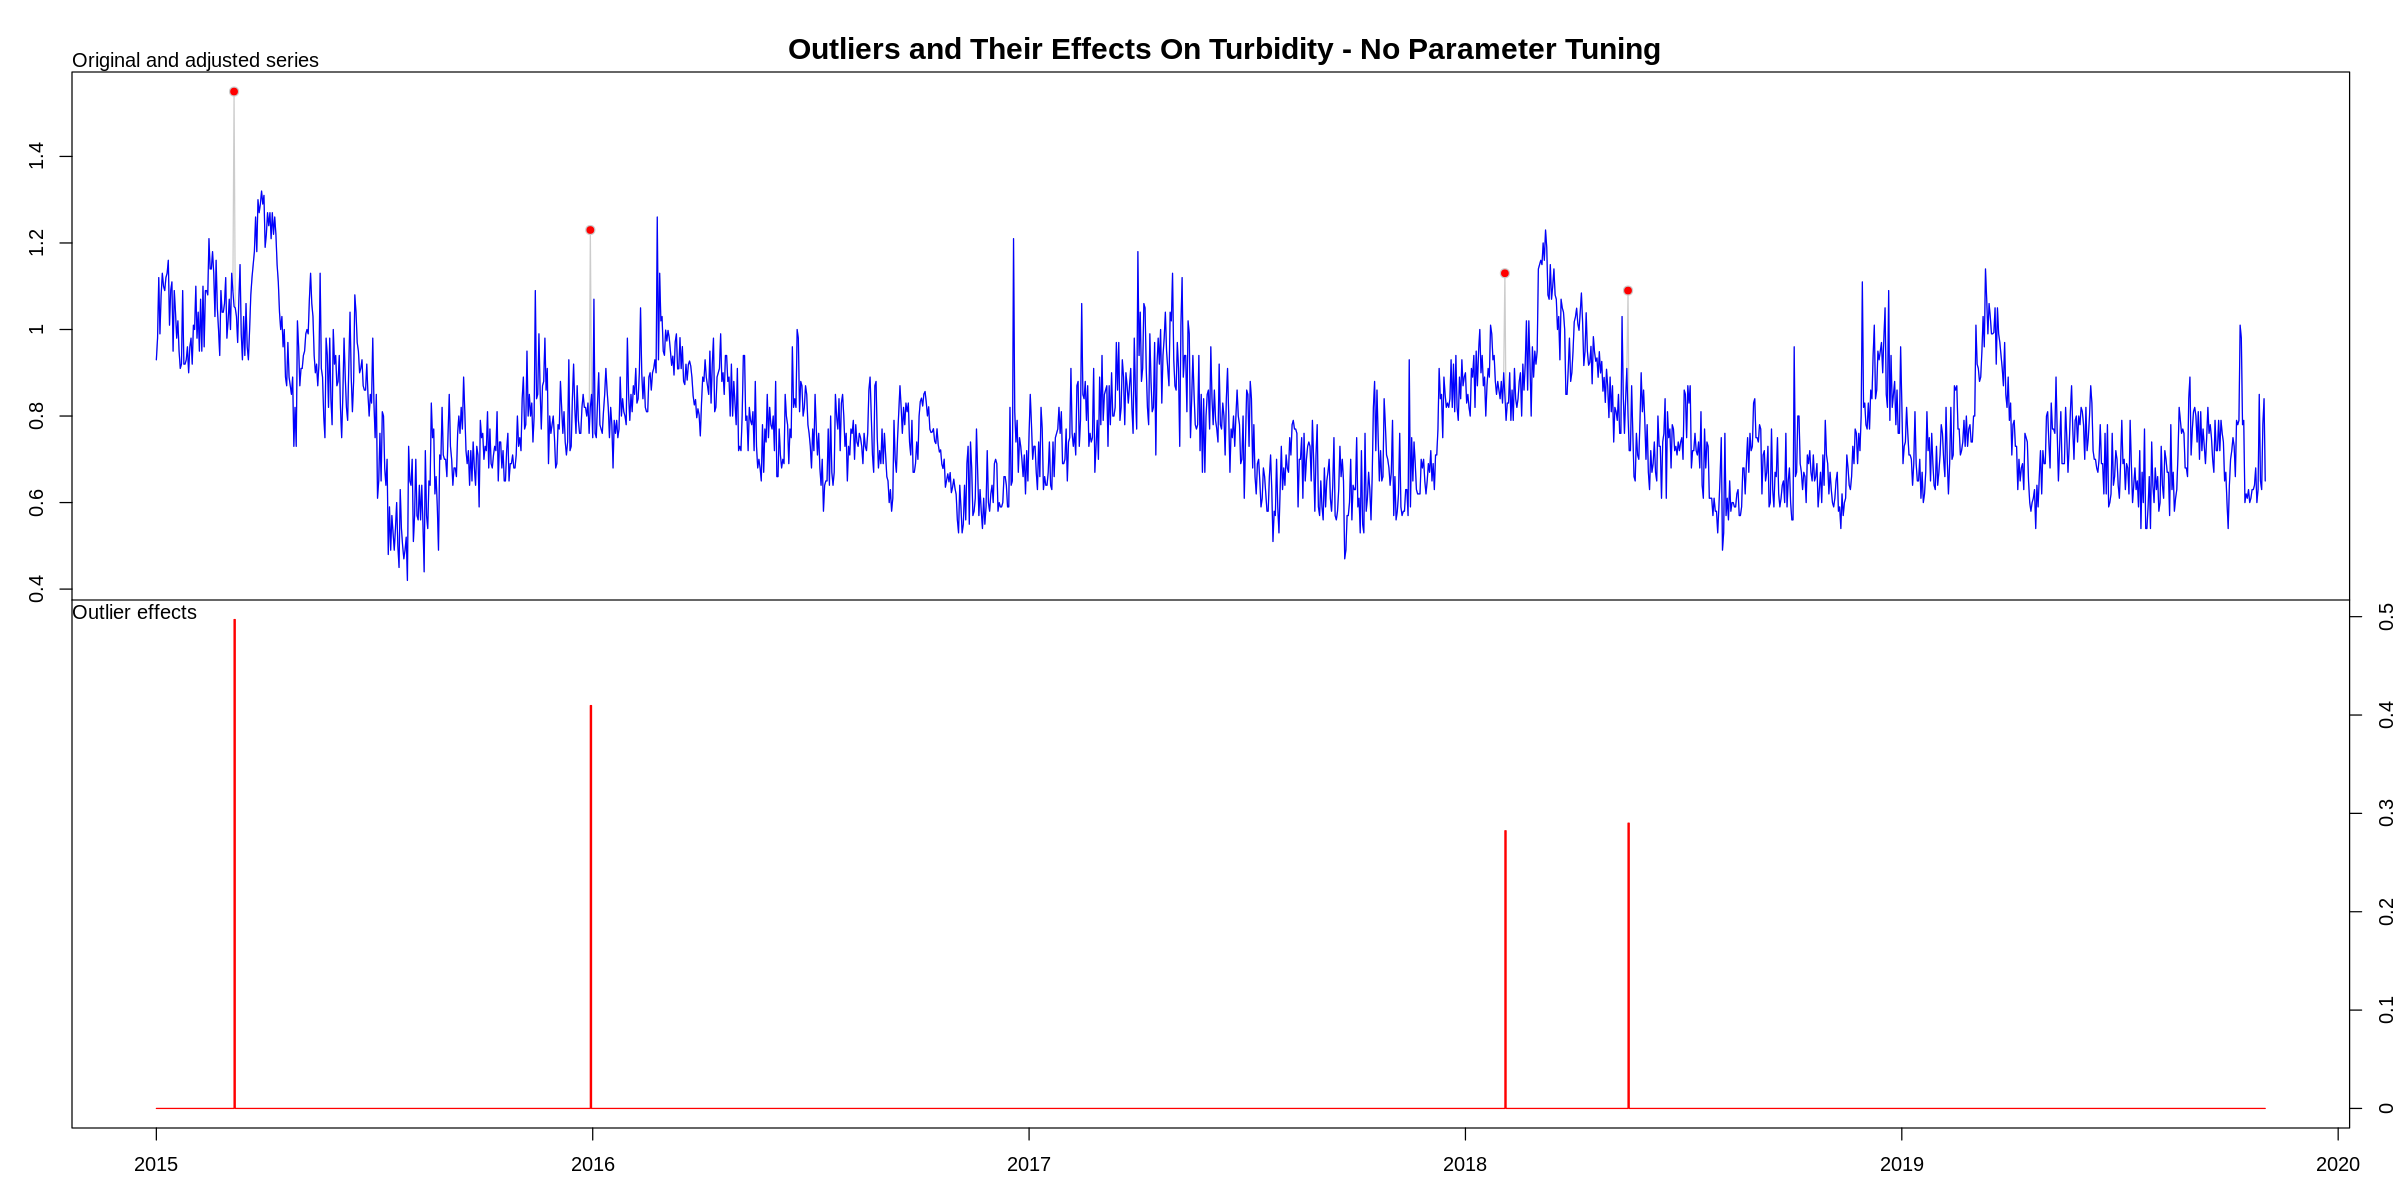

In [235]:
# plot without tuning
ts_out_no_tuning <- plot(outliers_turbidity_tso) + title("Outliers and Their Effects On Turbidity - No Parameter Tuning", cex.main=1.5)
ts_out_no_tuning

#### Fitting an arima model


	Ljung-Box test

data:  Residuals from ARIMA(4,1,1)
Q* = 398.38, df = 348, p-value = 0.03219

Model df: 5.   Total lags used: 353



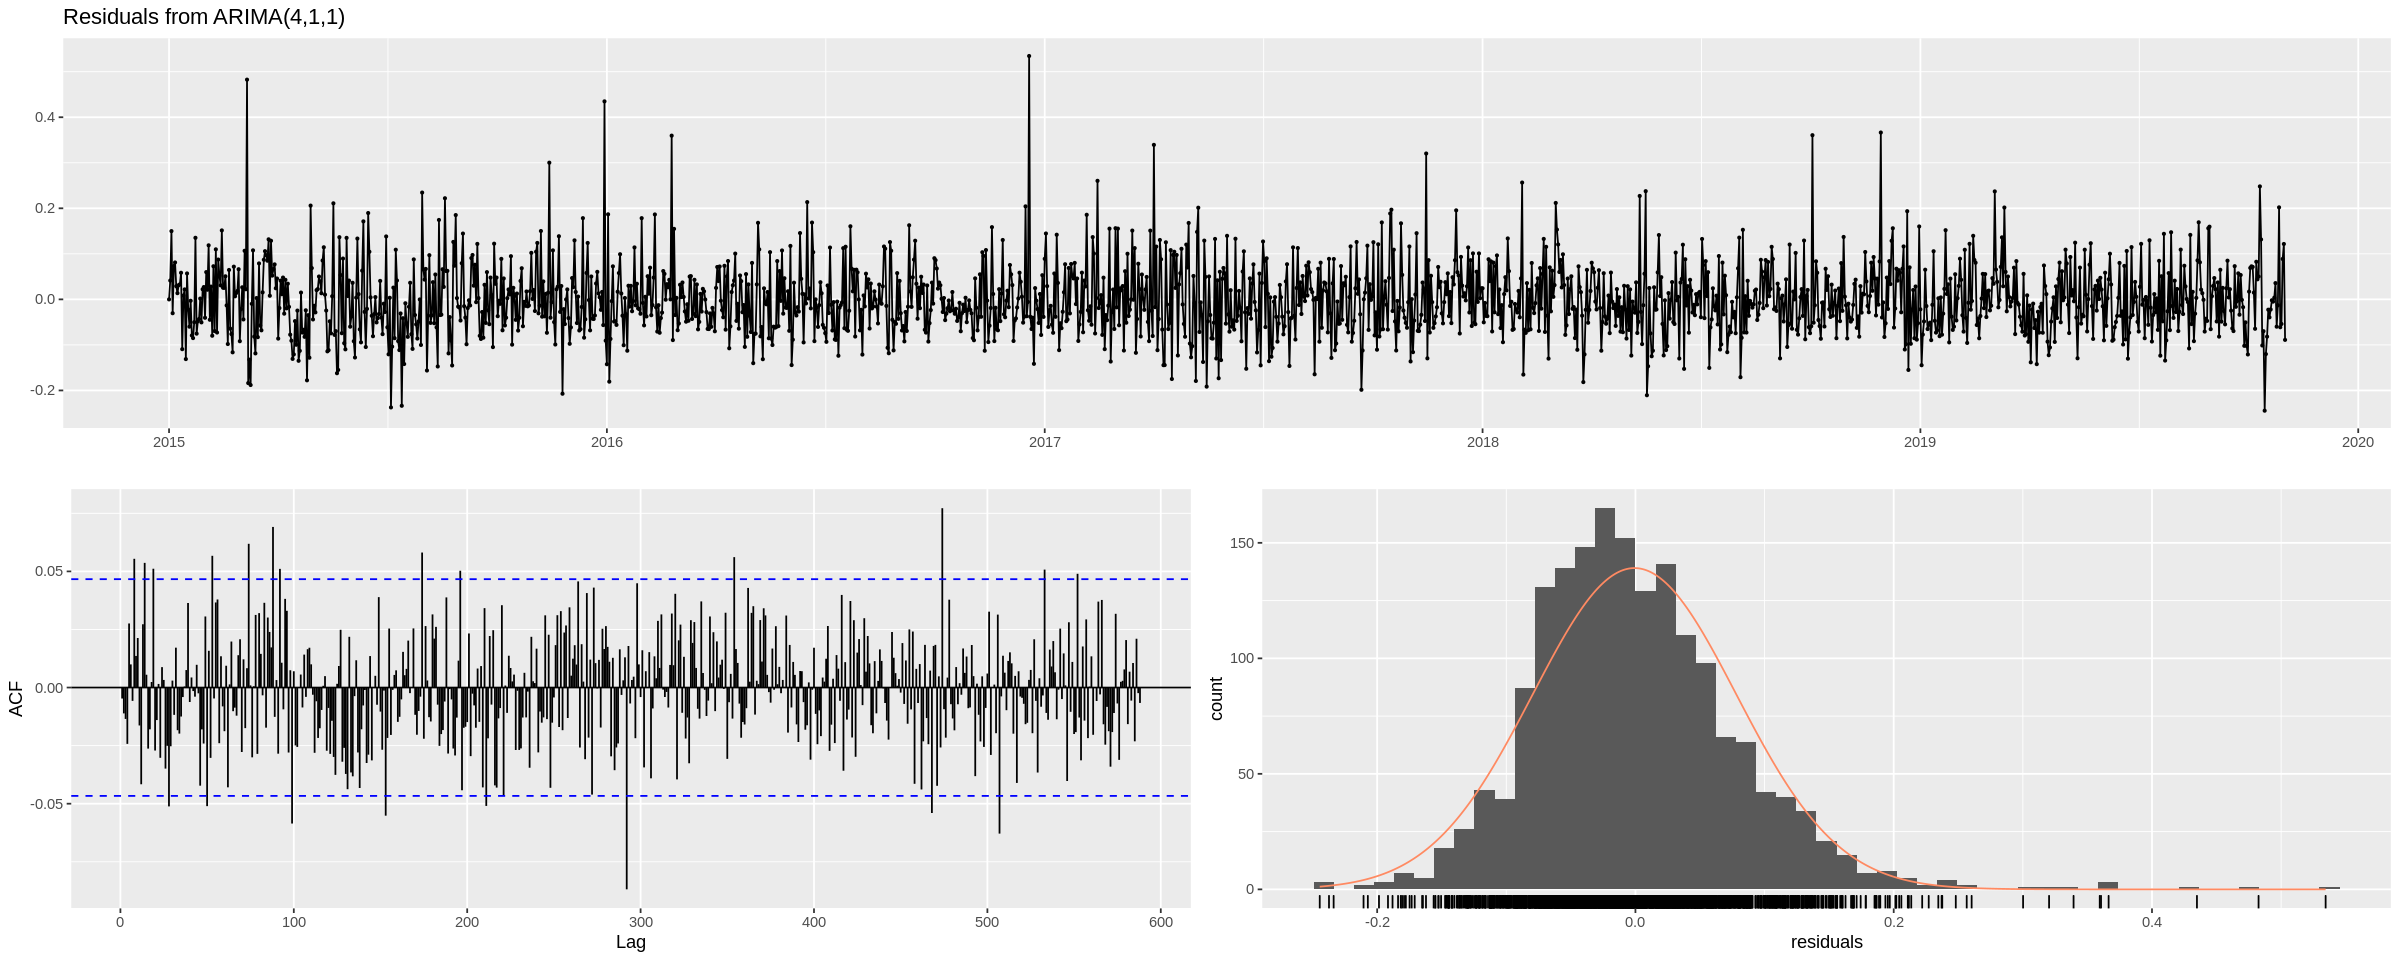

In [263]:
# look for the model auto arima suggested
turbidity_arima_411 <- auto.arima(turbidity,lambda = BoxCox.lambda(turbidity))
checkresiduals(turbidity_arima_411)

#### Prediction after outlier detection

In [66]:
# fit arima using adj y
adj_fit <- forecast::auto.arima(outliers_auto_turbidity$yadj)
adj_fit

Series: outliers_auto_turbidity$yadj 
ARIMA(4,1,1) 

Coefficients:
         ar1     ar2     ar3     ar4      ma1
      0.3102  0.1645  0.1886  0.1115  -0.9507
s.e.  0.0395  0.0334  0.0307  0.0283   0.0307

sigma^2 estimated as 0.00555:  log likelihood=2080.19
AIC=-4148.38   AICc=-4148.33   BIC=-4115.53

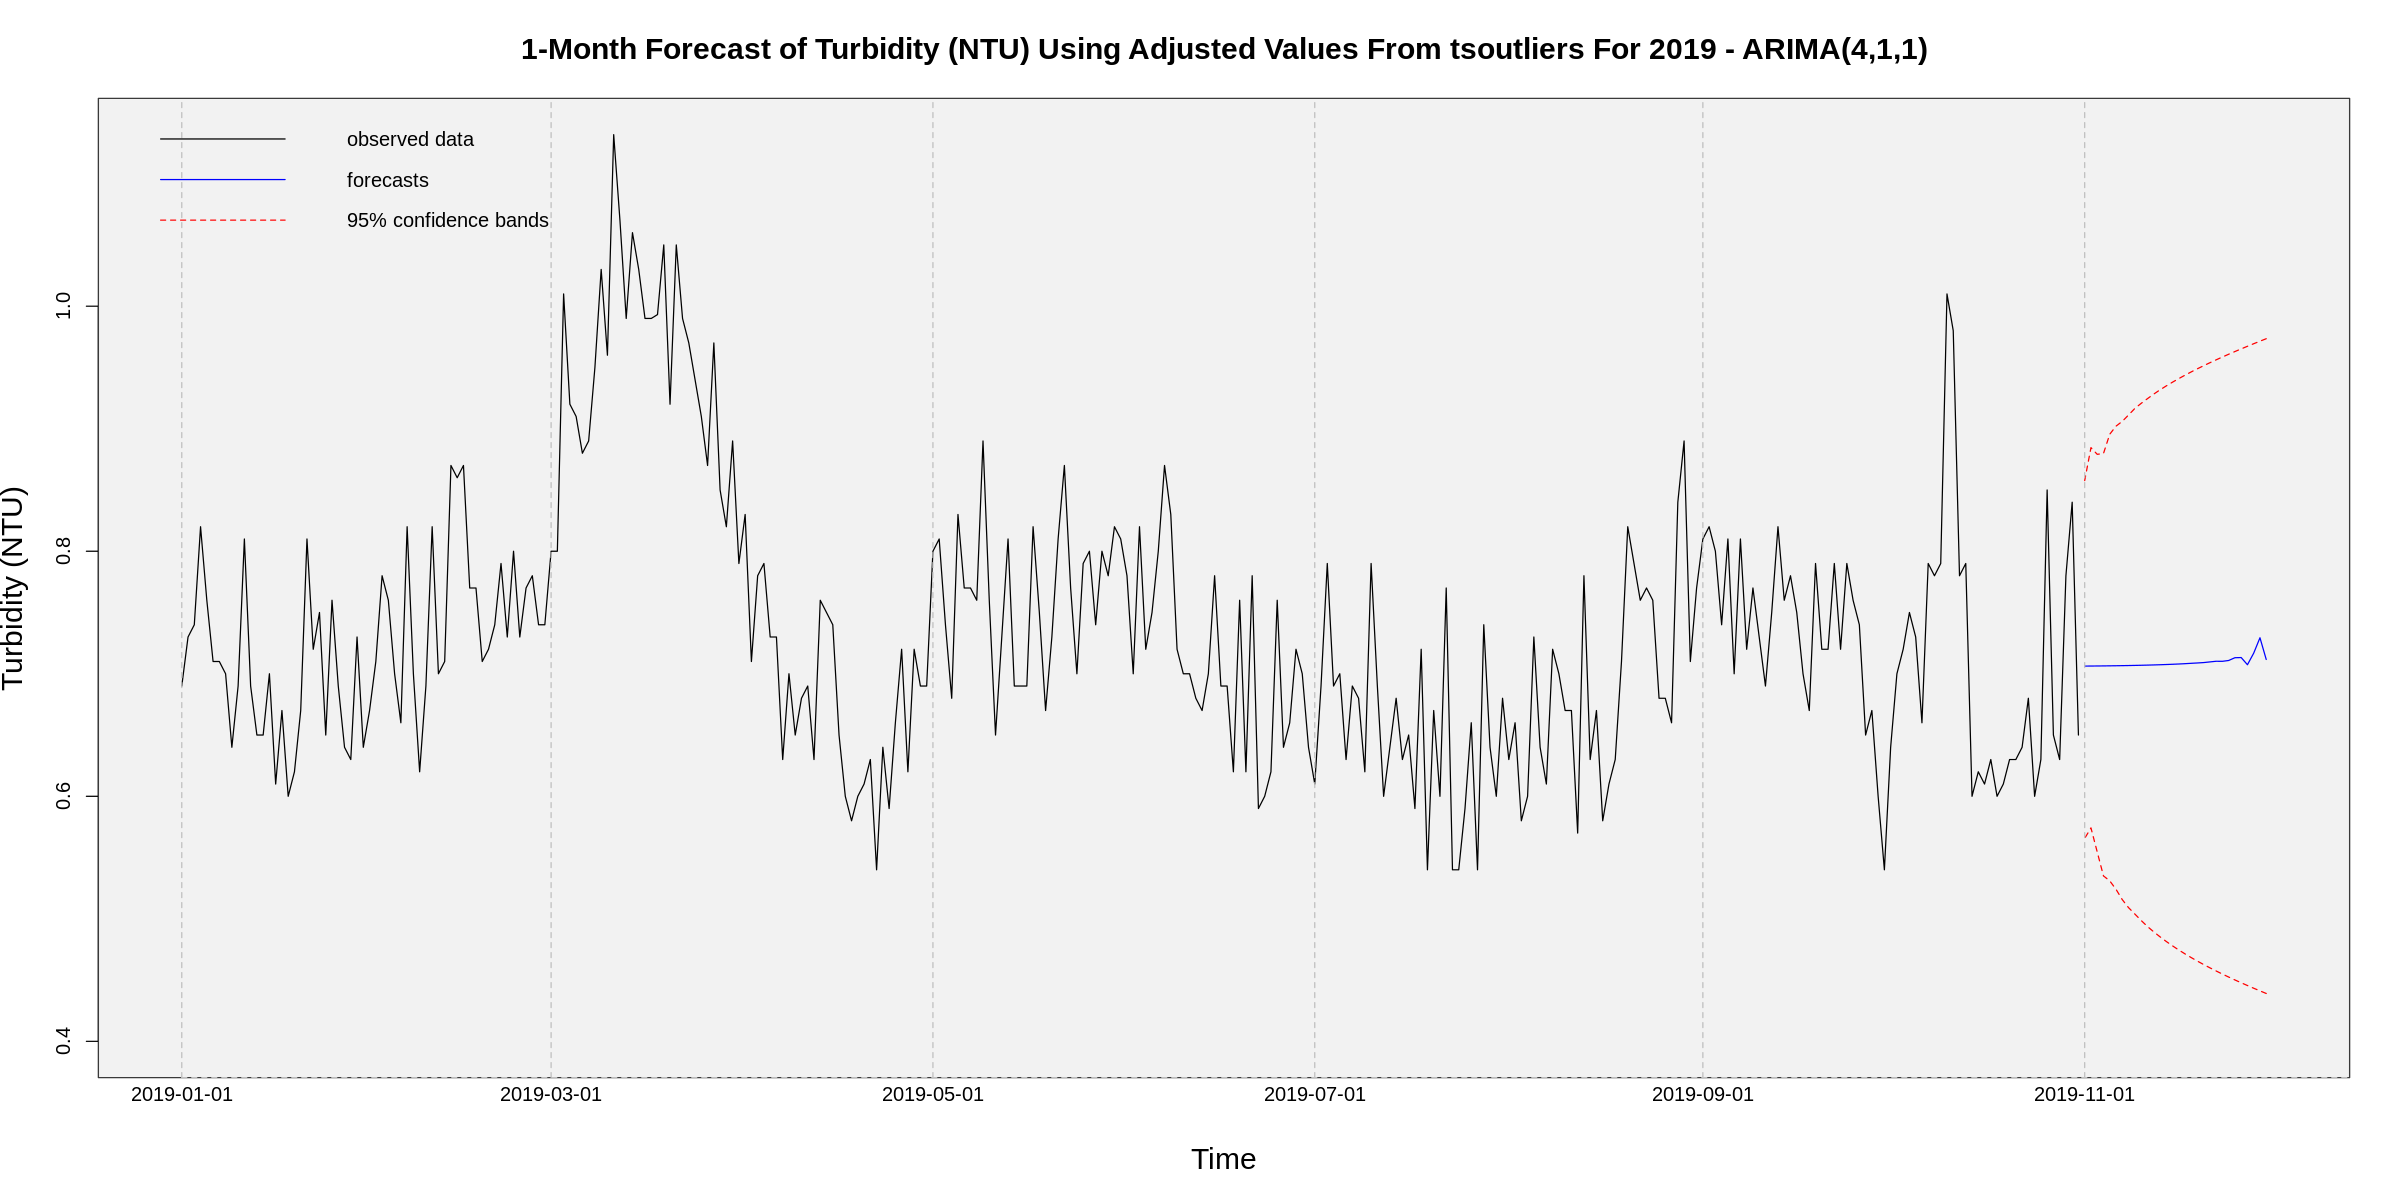

In [226]:
# we'll use the detection with tuning since that seems to give better detection
# forecast using adjusted y from tsoutliers 
options(repr.plot.width=20, repr.plot.height=10) 
adj_fc <- forecast::forecast(adj_fit, h=30)  # get the forecast
adj_fc_ts <- ts(adj_fc$mean, start=c(2019,11))  # create the point forecast as ts
origin <- tail(turbidity, 304)  # from 2019-01-01 onwards, 304 are the days between 2019-01-01 to 2019-10-31 
x <- ts(c(origin, adj_fc_ts), start=c(2019,1), frequency = frequency(origin))  # combine the object and sliced data as ts
time <- seq(as.Date("2019-01-01"), as.Date("2019-11-30"), by=1)  # calculate the dates for the origin and forecast
time_fc <- time[seq(length=length(adj_fc_ts), from=length(x), by=-1)]  # get the time frame for the forecast
upper <- ts(rev(adj_fc$upper[,"95%"]), start=c(2019,11))  # get the upper boundary
lower <- ts(rev(adj_fc$lower[,"95%"]), start=c(2019,11))  # get the lower 95% boundary

# plot
plot(time, x, type="n", xaxt="n", ylim=c(0.4, max(x)), ylab="", xlab="")
rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = "grey95")
lines(head(time, 304),origin)
lines(time_fc, adj_fc_ts, type="l", col="blue")
lines(time_fc, upper, type = "l", col = "red", lty = 2)
lines(time_fc, lower, type = "l", col = "red", lty = 2)

# add in xticks
xtick <- seq(as.Date("2019-01-01"), by = "2 month", length=10+2) 
axis(side = 1, at = xtick, labels = FALSE, tck = 1, lty = 2, col = "grey")
text(x=xtick,  par("usr")[3], 
     labels = xtick, srt = 0, pos = 1, xpd = TRUE)

# legend
legend("topleft", legend = c("observed data", 
  "forecasts", "95% confidence bands"), lty = c(1,1,2,2), 
  col = c("black", "blue", "red", "red"), bty = "n")

# title
title(main="1-Month Forecast of Turbidity (NTU) Using Adjusted Values From tsoutliers For 2019 - ARIMA(4,1,1)",
     ylab="Turbidity (NTU)", xlab="Time", cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
# plot(forecast(fit, h=200), include = X)  # this will plot the X amount form original series but the xticks will be incomprehensible

In [247]:
accuracy(adj_fc)
# https://stats.stackexchange.com/questions/194453/interpreting-accuracy-results-for-an-arima-model-fit

ME            RMSE      MAE        MPE       MAPE     MASE     
Training set -0.0007066374 0.0743732 0.05822563 -1.019618 8.062277 0.3648168
             ACF1        
Training set -0.004567992

### Conclusion

`tsoutliers` is another useful package to detect outliers. Fundamentally, it works differently from `anomalize`. It applies model to the data, test for the different types of outliers and then refit and retest while the latter decompose and detect outliers. `tsoutliers` is useful in detecting the different types of outliers and visualising the possible downstream effects. It even cleans up the effect of the outliers and return it as `adjy`! However, using the adjusted y must be cautioned as removing outliers might give incorrect prediction interval. On the other hand, not removing outlier will present skewed distribution and thereby, possibly wrong conclusion. In short, discretion is needed when it comes to the decision about what to do with outliers. Check out this [post](https://stats.stackexchange.com/questions/69874/how-to-correct-outliers-once-detected-for-time-series-data-forecasting) for more information.

In [248]:
save.image("outlier.RData")